# 🛫 **Proyek Analisis Data: Air Quality**
- **Nama:** Ngakan Putu Widyasprana
- **Email:** ngakanputu39@gmail.com
- **ID Dicoding:** ngakanwp

Data yang akan digunakan adalah Air Quality yang sumbernya dapat diakses pada tautan berikut [Air Quality](https://github.com/marceloreis/HTI/tree/master).

---

## 🙋🏻‍♀️ **Pertanyaan Bisnis**



Air Quality adalah dataset mengenai kualitas udara pada 12 daerah di beijing ([sumber informasi](https://archive.ics.uci.edu/dataset/501/beijing+multi+site+air+quality+data)) yang sudah dicocokan dengan data di China Meteorological Administration, rentang waktunya 1 Maret 2013 hingga 28 Februari 2017.

**Parameter pada Dataset:**

1. Month: Bulan pada saat pengukuran data (angka 1-12).
2. Day: Hari pada saat pengukuran data (angka 1-31).
3. Hour: Jam pada saat pengukuran data (angka 0-23).
4. PM2.5: Konsentrasi partikel halus PM2.5 (μg/m³). PM2.5 adalah 5 partikel udara dengan diameter ≤ 2.5 μm yang dapat membahayakan kesehatan.
5. PM10: Konsentrasi partikel udara PM10 (μg/m³), yaitu partikel dengan diameter ≤ 10 μm.
6. SO2: Konsentrasi sulfur dioksida (μg/m³), gas yang dapat berasal dari pembakaran bahan bakar fosil.
7. NO2: Konsentrasi nitrogen dioksida (μg/m³), gas polutan hasil pembakaran kendaraan atau industri.
8. CO: Konsentrasi karbon monoksida (μg/m³), gas beracun yang dihasilkan dari pembakaran tidak sempurna.
9. O3: Konsentrasi ozon (μg/m³), gas yang dapat membentuk kabut fotokimia dan memengaruhi kualitas udara.
10. TEMP: Suhu udara pada saat pengukuran (°C).
11. PRES: Tekanan udara pada saat pengukuran (hPa).
12. DEWP: Suhu titik embun (°C), yaitu suhu di mana udara mencapai kejenuhan dan kondensasi terjadi.
13. RAIN: Presipitasi atau curah hujan yang terjadi (mm).
14. Wd: Arah angin pada saat pengukuran (kompas, seperti N, S, E, W).
15. WSPM: Kecepatan angin (m/s).
16. Station: Nama lokasi tempat pemantauan kualitas udara dilakukan.

Pertanyaan Bisnis:
- **Bagaimana tren polusi udara pada masing-masing daerah di Beijing?**
- **Kapan waktu udara terparah terjadi di masing-masing daerah di Beijing?**
- **Apakah ada korelasi antar parameter pemicu (TEMP, DEWP, RAIN, Wd, WSPM) dengan parameter polusi (PM2.5, PM10, SO2, NO2, CO, O3)? Jika ada, maka bagaimana korelasinya?**

## 📚 **Library Data Analisis**

In [1]:
# Library Data Retrieving and Modification
import zipfile
import os

# Library for Data Preprocessing
import pandas as pd
import numpy as np

# Library for Visualization
from scipy.interpolate import interp1d
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [110]:
!pip freeze > requirements.txt

## 🔍 **Data Wrangling**

### 📩 **Gathering Data**

Sebelum memulai menjalankan kode, silahkan lakukan upload file **Air-quality-dataset.zip** untuk bisa dilakukan proses unpack.

In [2]:
def unpack_zip(path):
    """
    Unpacks the specified zip file to a 'content' directory.

    This function checks if the given path exists. If not, it raises a
    FileNotFoundError. It then ensures that a 'content' directory is
    present, creating it if necessary, and extracts the zip file contents
    into this directory.

    Parameters:
      path (str): The path to the zip file to be unpacked.

    Raises:
      FileNotFoundError: If the specified zip file does not exist.
    """

    # Check if the path exists
    if not os.path.exists(path): raise FileNotFoundError(f"File '{path}' does not exist.")

    # Define the extraction destination
    extraction_path = "content"

    # Create the 'content' folder if it doesn't exist
    if not os.path.exists(extraction_path): os.makedirs(extraction_path)

    # Extract the zip file
    with zipfile.ZipFile(path, 'r') as zip_ref: zip_ref.extractall(extraction_path)

In [ ]:
unpack_zip('data/Air-quality-dataset.zip')

#### ⏩ **Insight Data Gathering**

---

Tidak ada insight yang bisa digali dalam sesi kali ini. Sesi kali ini berfokus untuk pengumpulan data yakni dengan cara melakukan unzip data ke folder yang sudah ditetapkan. Untuk akses data dan penilaian data dilanjutkan pada tahap berikutnya.

### 🔨 **Asessing Data**

Proses data asessing adalah proses untuk mengindentifikasi masalah pada data baik itu permasalahan data kosong, duplikat, dan data belum menggunakan format yang tepat. Pada sesi kali ini akan ada beberapa proses penilaian data, yakni sebagai berikut:
1. Missing Column
2. Duplicated Column
4. Invalid Column

In [4]:
def check_assessing_data(df):
    """
    This function assesses a DataFrame for null values, null records, duplicate rows,
    and provides an overview of the DataFrame's structure.

    Parameters:
      df (pandas.DataFrame): The DataFrame to be assessed.

    Returns:
      None
    """

    # Check Null, Duplicated, and Info Data
    null_data = df.isnull().sum()
    null_records = df[df.isnull().any(axis=1)]
    duplicate_data = df.duplicated().sum()

    # Print Data
    print("Null Data:")
    print(null_data)
    print("\nNull Records:")
    print(null_records)
    print("\nDuplicate Data:")
    print(duplicate_data)
    print("\nCheck Column Data:")
    df.info()

#### **1. Data Air Quality (DAQ) - Aotizhongxin (AO)**

In [5]:
# Read Data City -- Code: AO

daq_ao = pd.read_csv('content/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv', sep=',')
daq_ao.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [6]:
daq_ao.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


> Melakukan pengecekan apakah terdapat data kosong, jumlah record kosong, data duplikat, dan informasi data

In [7]:
check_assessing_data(daq_ao)

Null Data:
No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

Null Records:
          No  year  month  day  hour  PM2.5   PM10      SO2       NO2      CO  \
74        75  2013      3    4     2   34.0   62.0      NaN   14.0000   300.0   
75        76  2013      3    4     3   12.0   34.0   6.0000   12.0000     NaN   
76        77  2013      3    4     4    7.0   18.0  14.0000       NaN   400.0   
124      125  2013      3    6     4  192.0  203.0  83.6808  140.4252     NaN   
170      171  2013      3    8     2  339.0  400.0      NaN  162.0000  3899.0   
...      ...   ...    ...  ...   ...    ...    ...      ...       ...     ...   
34912  34913  2017      2   22    16  131.0  131.0      NaN   95.0000     NaN   
34913  34914  2017      2


---

Kesimpulannya Insight Data `daq_ao`:

1. Terdapat 3249 record data yang null atau kosong.
2. Tidak terdapat duplikat.
3. Column year, month, day, dan hour bisa diubah ke tipe data datetime[ns] sehingga lebih compact dalam analisis timeseries data.

#### **2. Data Air Quality (DAQ) - Changping (CH)**

In [8]:
# Read Data City -- Code : CH

daq_ch = pd.read_csv('content/PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv', sep=',')
daq_ch.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


> Melakukan pengecekan apakah terdapat data kosong, jumlah record kosong, data duplikat, dan informasi data

In [9]:
check_assessing_data(daq_ch)

Null Data:
No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

Null Records:
          No  year  month  day  hour  PM2.5   PM10   SO2    NO2      CO    O3  \
26        27  2013      3    2     2   13.0    9.0   NaN   56.0   800.0  33.0   
27        28  2013      3    2     3   14.0   24.0  23.0   42.0     NaN   NaN   
28        29  2013      3    2     4   14.0   18.0  24.0    NaN   400.0  45.0   
122      123  2013      3    6     2  146.0  153.0   NaN  100.0  2399.0  81.0   
123      124  2013      3    6     3  170.0  179.0  55.0   74.0     NaN  81.0   
...      ...   ...    ...  ...   ...    ...    ...   ...    ...     ...   ...   
34887  34888  2017      2   21    15    NaN    6.0   NaN   34.0     NaN   2.0   
34888  34889  2017      2


---

Kesimpulannya Insight data `daq_ch`:
1. Terdapat 2383 record data yang null atau kosong.
2. Tidak terdapat duplikat.
3. Column year, month, day, dan hour bisa diubah ke tipe data datetime[ns] sehingga lebih compact dalam analisis timeseries data.

#### **3. Data Air Quality (DAQ) - Dingling (DL)**

In [10]:
# Read Data City -- Code: DL

daq_dl = pd.read_csv('content/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', sep=',')
daq_dl.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


> Melakukan pengecekan apakah terdapat data kosong, jumlah record kosong, data duplikat, dan informasi data

In [11]:
check_assessing_data(daq_dl)

Null Data:
No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

Null Records:
          No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  \
0          1  2013      3    1     0    4.0   4.0  3.0   NaN  200.0  82.0   
1          2  2013      3    1     1    7.0   7.0  3.0   NaN  200.0  80.0   
3          4  2013      3    1     3    6.0   6.0  3.0   NaN  200.0  79.0   
4          5  2013      3    1     4    5.0   5.0  3.0   NaN  200.0  81.0   
10        11  2013      3    1    10    8.0   NaN  3.0   NaN  200.0  83.0   
...      ...   ...    ...  ...   ...    ...   ...  ...   ...    ...   ...   
34884  34885  2017      2   21    12   62.0  62.0  NaN  53.0    NaN   NaN   
34885  34886  2017      2   21    13    NaN   NaN  NaN   


---

Kesimpulannya Insight data `daq_dl`:
1. Terdapat 3758 record data yang null atau kosong.
2. Tidak terdapat duplikat.
3. Column year, month, day, dan hour bisa diubah ke tipe data datetime[ns] sehingga lebih compact dalam analisis timeseries data.

#### **4. Data Air Quality (DAQ) - Dongsi(DG)**

In [12]:
# Read Data City -- Code: DG

daq_dg = pd.read_csv('content/PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv', sep=',')
daq_dg.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


> Melakukan pengecekan apakah terdapat data kosong, jumlah record kosong, data duplikat, dan informasi data

In [13]:
check_assessing_data(daq_dg)

Null Data:
No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

Null Records:
          No  year  month  day  hour  PM2.5   PM10      SO2      NO2      CO  \
2          3  2013      3    1     2    7.0    7.0      NaN  17.0000   300.0   
3          4  2013      3    1     3    3.0    3.0   5.0000  18.0000     NaN   
4          5  2013      3    1     4    3.0    3.0   7.0000      NaN   200.0   
74        75  2013      3    4     2   43.0   48.0   6.2832  20.1194     NaN   
98        99  2013      3    5     2   95.0  133.0      NaN  71.0000  1399.0   
...      ...   ...    ...  ...   ...    ...    ...      ...      ...     ...   
34913  34914  2017      2   22    17    NaN    6.0  10.0000  44.0000  1400.0   
35030  35031  2017      2   27   


---

Kesimpulannya Insight data `daq_dg`:
1. Terdapat 4726 record data yang null atau kosong.
2. Tidak terdapat duplikat.
3. Column year, month, day, dan hour bisa diubah ke tipe data datetime[ns] sehingga lebih compact dalam analisis timeseries data.

#### **5. Data Air Quality (DAQ) - Guanyuan (GY)**

In [14]:
# Read Data City -- Code: GY

daq_gy = pd.read_csv('content/PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv', sep=',')
daq_gy.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


> Melakukan pengecekan apakah terdapat data kosong, jumlah record kosong, data duplikat, dan informasi data

In [15]:
check_assessing_data(daq_gy)

Null Data:
No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

Null Records:
          No  year  month  day  hour  PM2.5   PM10    SO2    NO2      CO  \
26        27  2013      3    2     2    4.0    6.0    NaN   26.0   400.0   
27        28  2013      3    2     3    3.0    6.0   12.0   32.0     NaN   
28        29  2013      3    2     4    3.0    6.0    9.0    NaN   400.0   
122      123  2013      3    6     2  176.0  222.0    NaN  158.0  3500.0   
123      124  2013      3    6     3  160.0  189.0  102.0  160.0     NaN   
...      ...   ...    ...  ...   ...    ...    ...    ...    ...     ...   
35043  35044  2017      2   28     3    NaN    NaN    NaN    NaN     NaN   
35044  35045  2017      2   28     4    NaN    NaN    NaN    NaN 


---

Kesimpulannya Insight data `daq_gy`:
1. Terdapat 2801 record data yang null atau kosong.
2. Tidak terdapat duplikat.
3. Column year, month, day, dan hour bisa diubah ke tipe data datetime[ns] sehingga lebih compact dalam analisis timeseries data.

#### **6. Data Air Quality (DAQ) - Gucheng (GU)**

In [16]:
# Read Data City -- Code: GU

daq_gu = pd.read_csv('content/PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv', sep=',')
daq_gu.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


> Melakukan pengecekan apakah terdapat data kosong, jumlah record kosong, data duplikat, dan informasi data

In [17]:
check_assessing_data(daq_gu)

Null Data:
No            0
year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd          159
WSPM         42
station       0
dtype: int64

Null Records:
          No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  \
0          1  2013      3    1     0    6.0  18.0  5.0  NaN  800.0  88.0   
1          2  2013      3    1     1    6.0  15.0  5.0  NaN  800.0  88.0   
2          3  2013      3    1     2    5.0  18.0  NaN  NaN  700.0  52.0   
3          4  2013      3    1     3    6.0  20.0  6.0  NaN    NaN   NaN   
4          5  2013      3    1     4    5.0  17.0  5.0  NaN  600.0  73.0   
...      ...   ...    ...  ...   ...    ...   ...  ...  ...    ...   ...   
34961  34962  2017      2   24    17   19.0  47.0  8.0  NaN  500.0  71.0   
34962  34963  2017      2   24    18   21.0  39.0  9.0  NaN  500.


---

Kesimpulannya Insight data `daq_gu`:
1. Terdapat 2560 record data yang null atau kosong.
2. Tidak terdapat duplikat.
3. Column year, month, day, dan hour bisa diubah ke tipe data datetime[ns] sehingga lebih compact dalam analisis timeseries data.

#### **7. Data Air Quality (DAQ) - Huairou (HU)**

In [18]:
# Read Data City -- Code: HU

daq_hu = pd.read_csv('content/PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv', sep=',')
daq_hu.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


> Melakukan pengecekan apakah terdapat data kosong, jumlah record kosong, data duplikat, dan informasi data

In [19]:
check_assessing_data(daq_hu)

Null Data:
No            0
year          0
month         0
day           0
hour          0
PM2.5       953
PM10        777
SO2         980
NO2        1639
CO         1422
O3         1151
TEMP         51
PRES         53
DEWP         53
RAIN         55
wd          302
WSPM         49
station       0
dtype: int64

Null Records:
          No  year  month  day  hour  PM2.5  PM10  SO2   NO2      CO    O3  \
1          2  2013      3    1     1    4.0   4.0  3.0   NaN   100.0  92.0   
2          3  2013      3    1     2    4.0   4.0  NaN   NaN   100.0  91.0   
3          4  2013      3    1     3    3.0   3.0  3.0   2.0     NaN   NaN   
4          5  2013      3    1     4    3.0   3.0  7.0   NaN   300.0  86.0   
11        12  2013      3    1    11   10.0  11.0  3.0   NaN   300.0  87.0   
...      ...   ...    ...  ...   ...    ...   ...  ...   ...     ...   ...   
34885  34886  2017      2   21    13    NaN   NaN  NaN   NaN     NaN   NaN   
34934  34935  2017      2   23    14    NaN   6.0


---

Kesimpulannya Insight data `daq_hu`:
1. Terdapat 3356 record data yang null atau kosong.
2. Tidak terdapat duplikat.
3. Column year, month, day, dan hour bisa diubah ke tipe data datetime[ns] sehingga lebih compact dalam analisis timeseries data.

#### **8. Data Air Quality (DAQ) - Nongzhanquan (NZ)**

In [20]:
# Read Data City -- Code: NZ

daq_nz = pd.read_csv('content/PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv', sep=',')
daq_nz.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


> Melakukan pengecekan apakah terdapat data kosong, jumlah record kosong, data duplikat, dan informasi data

In [21]:
check_assessing_data(daq_nz)

Null Data:
No            0
year          0
month         0
day           0
hour          0
PM2.5       628
PM10        440
SO2         446
NO2         692
CO         1206
O3          506
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

Null Records:
          No  year  month  day  hour  PM2.5   PM10    SO2    NO2      CO  \
26        27  2013      3    2     2    3.0    9.0    NaN   38.0   400.0   
27        28  2013      3    2     3    3.0    6.0    8.0   30.0     NaN   
28        29  2013      3    2     4    3.0    6.0    7.0    NaN   400.0   
122      123  2013      3    6     2  184.0  214.0    NaN  158.0  2399.0   
123      124  2013      3    6     3  169.0  190.0  107.0  155.0     NaN   
...      ...   ...    ...  ...   ...    ...    ...    ...    ...     ...   
35026  35027  2017      2   27    10    NaN    NaN    NaN    NaN     NaN   
35029  35030  2017      2   27    13    NaN    6.0   40.0   93.0 


---

Kesimpulannya Insight data `daq_nz`:
1. Terdapat 1950 record data yang null atau kosong.
2. Tidak terdapat duplikat.
3. Column year, month, day, dan hour bisa diubah ke tipe data datetime[ns] sehingga lebih compact dalam analisis timeseries data.

#### **9. Data Air Quality (DAQ) - Shunyi (SH)**

In [22]:
# Read Data City -- Code: SH

daq_sh = pd.read_csv('content/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv', sep=',')
daq_sh.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


> Melakukan pengecekan apakah terdapat data kosong, jumlah record kosong, data duplikat, dan informasi data

In [23]:
check_assessing_data(daq_sh)

Null Data:
No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

Null Records:
          No  year  month  day  hour  PM2.5   PM10   SO2    NO2      CO    O3  \
2          3  2013      3    1     2   14.0   14.0   NaN    7.0   200.0  22.0   
3          4  2013      3    1     3   12.0   12.0   3.0    5.0     NaN   NaN   
4          5  2013      3    1     4   12.0   12.0   3.0    NaN   200.0  11.0   
31        32  2013      3    2     7   13.0    NaN  12.0   31.0   700.0  49.0   
88        89  2013      3    4    16   13.0    NaN   8.0   21.0   500.0  84.0   
...      ...   ...    ...  ...   ...    ...    ...   ...    ...     ...   ...   
34937  34938  2017      2   23    17    NaN    NaN   2.0   17.0   300.0   NaN   
34938  34939  2017      2


---

Kesimpulannya Insight data `daq_sh`:
1. Terdapat 4870 record data yang null atau kosong.
2. Tidak terdapat duplikat.
3. Column year, month, day, dan hour bisa diubah ke tipe data datetime[ns] sehingga lebih compact dalam analisis timeseries data.

#### **10. Data Air Quality (DAQ) - Tiantan (TI)**

In [24]:
# Read Data City -- TI

daq_ti = pd.read_csv('content/PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv', sep=',')
daq_ti.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


> Melakukan pengecekan apakah terdapat data kosong, jumlah record kosong, data duplikat, dan informasi data

In [25]:
check_assessing_data(daq_ti)

Null Data:
No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

Null Records:
          No  year  month  day  hour  PM2.5   PM10   SO2    NO2      CO    O3  \
26        27  2013      3    2     2    4.0    8.0   NaN   25.0   400.0  57.0   
27        28  2013      3    2     3    9.0   10.0   8.0   26.0     NaN  83.0   
28        29  2013      3    2     4    3.0    8.0   7.0    NaN   500.0  54.0   
122      123  2013      3    6     2  199.0  226.0   NaN  124.0  2799.0  94.0   
123      124  2013      3    6     3  173.0  186.0  87.0  122.0     NaN  94.0   
...      ...   ...    ...  ...   ...    ...    ...   ...    ...     ...   ...   
35032  35033  2017      2   27    16    NaN    NaN   NaN    NaN     NaN   NaN   
35057  35058  2017      2


---

Kesimpulannya Insight data `daq_ti`:
1. Terdapat 2221 record data yang null atau kosong.
2. Tidak terdapat duplikat.
3. Column year, month, day, dan hour bisa diubah ke tipe data datetime[ns] sehingga lebih compact dalam analisis timeseries data.

#### **11. Data Air Quality (DAQ) - Wanliu (WL)**

In [26]:
# Read Data City -- Code: WL

daq_wl = pd.read_csv('content/PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv', sep=',')
daq_wl.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


> Melakukan pengecekan apakah terdapat data kosong, jumlah record kosong, data duplikat, dan informasi data

In [27]:
check_assessing_data(daq_wl)

Null Data:
No            0
year          0
month         0
day           0
hour          0
PM2.5       382
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64

Null Records:
          No  year  month  day  hour  PM2.5   PM10   SO2    NO2      CO    O3  \
2          3  2013      3    1     2    3.0    6.0   NaN   19.0   400.0  55.0   
3          4  2013      3    1     3   11.0   30.0   8.0   14.0     NaN   NaN   
4          5  2013      3    1     4    3.0   13.0   9.0    NaN   300.0  54.0   
98        99  2013      3    5     2  113.0  167.0   NaN   99.0  1700.0  60.0   
99       100  2013      3    5     3  129.0  179.0  61.0   92.0     NaN  60.0   
...      ...   ...    ...  ...   ...    ...    ...   ...    ...     ...   ...   
34885  34886  2017      2   21    13    NaN    NaN   NaN    NaN     NaN   NaN   
34907  34908  2017      2


---

Kesimpulannya Insight data `daq_wl`:
1. Terdapat 4430 record data yang null atau kosong.
2. Tidak terdapat duplikat.
3. Column year, month, day, dan hour bisa diubah ke tipe data datetime[ns] sehingga lebih compact dalam analisis timeseries data.

#### **12. Data Air Quality (DAQ) - Wanshouxigong (WX)**

In [28]:
# Read Data City -- Code: WX

daq_wx = pd.read_csv('content/PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_20130301-20170228.csv', sep=',')
daq_wx.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


> Melakukan pengecekan apakah terdapat data kosong, jumlah record kosong, data duplikat, dan informasi data

In [29]:
check_assessing_data(daq_wx)

Null Data:
No            0
year          0
month         0
day           0
hour          0
PM2.5       696
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
dtype: int64

Null Records:
          No  year  month  day  hour  PM2.5   PM10  SO2   NO2      CO    O3  \
2          3  2013      3    1     2    8.0    8.0  NaN  16.0   200.0  59.0   
3          4  2013      3    1     3    8.0    8.0  3.0  16.0     NaN   NaN   
4          5  2013      3    1     4    8.0    8.0  3.0   NaN   300.0  36.0   
98        99  2013      3    5     2  107.0  138.0  NaN  56.0  1399.0  87.0   
99       100  2013      3    5     3  114.0  130.0  4.0  59.0     NaN  87.0   
...      ...   ...    ...  ...   ...    ...    ...  ...   ...     ...   ...   
35028  35029  2017      2   27    12    NaN    NaN  NaN   NaN     NaN   NaN   
35029  35030  2017      2   27    13    N


---

Kesimpulannya Insight data `daq_wx`:
1. Terdapat 2296 record data yang null atau kosong.
2. Tidak terdapat duplikat.
3. Column year, month, day, dan hour bisa diubah ke tipe data datetime[ns] sehingga lebih compact dalam analisis timeseries data.

#### ⏩ **Insight Asessing Data**

---

| Data Name | Null Value | Duplicate Data | Invalid Format |  
|----------|----------|----------|----------|
| AO | 3249 | 0 | Date Invalid |
| CH | 2383 | 0 | Date Invalid |
| DL | 3758 | 0 | Date Invalid |
| DG | 4726 | 0 | Date Invalid |
| GY | 2801 | 0 | Date Invalid |
| GU | 2560 | 0 | Date Invalid |
| HU | 3356 | 0 | Date Invalid |
| NZ | 1950 | 0 | Date Invalid |
| SH | 4870 | 0 | Date Invalid |
| TI | 2221 | 0 | Date Invalid |
| WL | 4430 | 0 | Date Invalid |
| WX | 2296 | 0 | Date Invalid |

---

**Conclusion Statement -- Insight Asessing Data:**
1. Dikarenakan jumah nilai *null* atau kosong yang sangat tinggi, maka jika memilih opsi untuk menghilangkan atau menghapus data akan menjadi kehilangan informasi data yang besar. Oleh karena itu, nilai *null* akan dilakukan penghitungan dan pengisian dengan **metode interpolarisasi** untuk mengisi data kosong.

2. Untuk mengatasi format tanggal yang belum sesuai nanti akan dilakukan proses penggabungan dan penyesuaian data dengan format [YY-MM-DD
 HH:mm].

3. Dapat dilihat juga semua data baik dari parameter polusi dan parameter pemicu polusi pada masing-masing daerah terdapat yang hilang atau missing dengan jumlah yang cukup banyak. Untuk analisis lanjutan nanti seperti pengecekan data *outlier* dan data *correlation* atau korelasi antar data akan dilakukan di segmen "**Further Asessing Data and Cleaning**" di proses Data Cleaning.

### 🧹 **Data Cleaning**

Proses data cleaning kali ini akan dilakukan sesuai dengan hasil proses asessing data sebelumnya. Dalam prosesnya nanti akan dibagi menjadi 3 tahapan proses:

1. Proses mengubah kolom tahun, bulan, hari, dan jam menjadi satu kolom baru bernama datetime.
2. Proses untuk mengatasi data *null* atau kosong.
3. Proses lanjutan setelah 2 proses dijalankan yakni mengatasi data *outlier* dan pengecekan korelasi antar kolom.

Dari ketiga proses tersebut nantinya akan diambil sebagai insight dan dilanjutkan ke tahap ke-4 yakni EDA (Exploratory Data Analysis).

#### **1. Deal with Invalid Date Format - Merge and Compact**

In [30]:
def combine_date(df):
    """
    Combine year, month, day, and hour columns in a DataFrame into a single datetime column.

    This function assumes the DataFrame contains columns named 'year', 'month', 'day', and 'hour',
    and these columns contain integer values. It combines them into a new column called 'datetime'
    in the format YYYY-MM-DD HH:00:00.

    Parameters:
    - df (pd.DataFrame): The input DataFrame with separate 'year', 'month', 'day', and 'hour' columns.

    Returns:
    - pd.DataFrame: The original DataFrame with an added 'datetime' column.
    """
    # Convert year, month, day, and hour column into new datetime column
    df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
    return df

In [31]:
all_daq = [
    daq_ao, daq_ch, daq_dl, daq_dg,
    daq_gy, daq_gu, daq_hu, daq_nz,
    daq_sh, daq_ti, daq_wl, daq_wx
]

all_daq = [combine_date(df) for df in all_daq]

In [32]:
all_daq[0]['datetime']

,datetime
0,2013-03-01 00:00:00
1,2013-03-01 01:00:00
2,2013-03-01 02:00:00
3,2013-03-01 03:00:00
4,2013-03-01 04:00:00
...,...
35059,2017-02-28 19:00:00
35060,2017-02-28 20:00:00
35061,2017-02-28 21:00:00
35062,2017-02-28 22:00:00


#### **2. Deal with Null Value - Interpolation**

In [33]:
def interpolation_linear(df):
    """
    Perform linear interpolation for numeric columns and forward/backward fill for object columns.

    This function assumes the DataFrame contains a 'datetime' column, which is set as the index.
    It also drops the 'No', 'year', 'month', 'day', and 'hour' columns if present, and performs
    the following:
    - For numeric columns (float64 or int64), missing values are interpolated using the 'linear' method.
    - For object columns, missing values are filled using forward-fill (ffill) and backward-fill (bfill).

    Parameters:
    - df (pd.DataFrame): The input DataFrame with a 'datetime' column and potential missing values.

    Returns:
    - pd.DataFrame: The DataFrame with missing values handled according to column type.
    """
    # Set datetime as Index First
    df.set_index('datetime', inplace=True)

    # Drop column that are not related anymore in DataFrame
    df.drop(['No', 'year', 'month', 'day', 'hour'], axis=1, inplace=True)

    # Do looping for column 'numeric'-- Linear or 'object'--ffill() and bfill()
    # column to use different method of interpolation
    for column in df.columns:
      if df[column].dtype in ['float64', 'int64']:

        df[column] = df[column].ffill().bfill()

        if df[column].isna().any():
            df[column] = df[column].interpolate(method='linear')

      elif df[column].dtype == 'object':
          df[column] = df[column].ffill().bfill()

    return df

In [34]:
all_daq = [
    daq_ao, daq_ch, daq_dl, daq_dg,
    daq_gy, daq_gu, daq_hu, daq_nz,
    daq_sh, daq_ti, daq_wl, daq_wx
]

all_daq = [interpolation_linear(df) for df in all_daq]

In [35]:
# Loop all to check the result

# Define the DataFrame Name
daq_names = [
    "daq_ao", "daq_ch", "daq_dl", "daq_dg",
    "daq_gy", "daq_gu", "daq_hu", "daq_nz",
    "daq_sh", "daq_ti", "daq_wl", "daq_wx"
]

# Make Variabel to Store Missing Value
missing_values = {}

# Loop Trough All Dataframe and Insert in missing_values
for name, df in zip(daq_names, all_daq):
    missing_values[name] = df.isna().sum()

# Convert and Transpose the missing_values
missing_values_df = pd.DataFrame(missing_values)
missing_values_df = missing_values_df.T

# Reset Index and Rename 'Index' into 'DataFrame'
missing_values_df.reset_index(inplace=True)
missing_values_df.rename(columns={"index": "DataFrame"}, inplace=True)

missing_values_df

,DataFrame,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,daq_ao,0,0,0,0,0,0,0,0,0,0,0,0,0
1,daq_ch,0,0,0,0,0,0,0,0,0,0,0,0,0
2,daq_dl,0,0,0,0,0,0,0,0,0,0,0,0,0
3,daq_dg,0,0,0,0,0,0,0,0,0,0,0,0,0
4,daq_gy,0,0,0,0,0,0,0,0,0,0,0,0,0
5,daq_gu,0,0,0,0,0,0,0,0,0,0,0,0,0
6,daq_hu,0,0,0,0,0,0,0,0,0,0,0,0,0
7,daq_nz,0,0,0,0,0,0,0,0,0,0,0,0,0
8,daq_sh,0,0,0,0,0,0,0,0,0,0,0,0,0
9,daq_ti,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
all_daq[0].head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,
2013-03-01 00:00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
2013-03-01 01:00:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2013-03-01 02:00:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
2013-03-01 03:00:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
2013-03-01 04:00:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


#### **3. Further Asessing and Cleaning Data**

Setelah berhasil dalam menangani masalah pada data yakni *Invalid Date Format* dan *Null Value* selanjutnya adalah menangani masalah lanjutan seperti data *outlier* dan mengecek korelasi antar data.

Akan tetapi sebelum itu, pastikan sekali lagi semua format data baik itu `int64`, `datetime[ns]`, `float64`, dan `object` sudah benar. Salah satu contohnya pada tipe data `float64` yang data seharusnya berupa angka desimal seperti 0.0, 800.0, 500.0 dan lainnya.

In [37]:
def ensure_correct_dtypes(df):
    """
    Ensures all columns in a list of DataFrames have the correct data types.

    This function checks each DataFrame and performs the following operations:
    - If the index is of datetime type, it is reset and moved to a regular column.
    - Numeric columns are converted to numeric, coercing errors (i.e., invalid values become NaN).
    - Datetime columns (including columns with 'date' in their name) are converted to datetime, coercing errors.
    - Object (string) columns are converted to strings.

    Parameters:
    - dfs (list of pd.DataFrame): A list of DataFrames to be processed.

    Returns:
    - list of pd.DataFrame: A list of DataFrames with corrected data types.
    """

    # Define variabel for dataframe that already corrected
    corrected_dataframes = []

    # Looping data in list of dataframe and correct all data into
    # corresponding data type column.
    for data in df:
        data = data.copy()

        # Reset index datetime to regular column
        if pd.api.types.is_datetime64_any_dtype(data.index):
            data.reset_index(inplace=True)

        # Looping all column in dataframe
        for col in data.columns:

            # Check and correct data in column numeric
            if pd.api.types.is_numeric_dtype(data[col]):
                data[col] = pd.to_numeric(data[col], errors='coerce')

            # Check and correct data in column datetime
            elif pd.api.types.is_datetime64_any_dtype(data[col]) or 'date' in col.lower():
                data[col] = pd.to_datetime(data[col], errors='coerce')

            # Check and correct data in column object
            elif pd.api.types.is_object_dtype(data[col]):
                data[col] = data[col].astype(str)

        # Store all corrected column into variabel corrected_dataframes
        corrected_dataframes.append(data)

    return corrected_dataframes

In [38]:
corrected_df = ensure_correct_dtypes(all_daq)

In [39]:
corrected_df[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  35064 non-null  datetime64[ns]
 1   PM2.5     35064 non-null  float64       
 2   PM10      35064 non-null  float64       
 3   SO2       35064 non-null  float64       
 4   NO2       35064 non-null  float64       
 5   CO        35064 non-null  float64       
 6   O3        35064 non-null  float64       
 7   TEMP      35064 non-null  float64       
 8   PRES      35064 non-null  float64       
 9   DEWP      35064 non-null  float64       
 10  RAIN      35064 non-null  float64       
 11  wd        35064 non-null  object        
 12  WSPM      35064 non-null  float64       
 13  station   35064 non-null  object        
dtypes: datetime64[ns](1), float64(11), object(2)
memory usage: 3.7+ MB


In [40]:
corrected_df[0]

,datetime,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013-03-01 01:00:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013-03-01 02:00:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013-03-01 03:00:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013-03-01 04:00:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017-02-28 19:00:00,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,2017-02-28 20:00:00,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,2017-02-28 21:00:00,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,2017-02-28 22:00:00,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


##### 🧶 **Check and Deal With the Outlier Data**

In [41]:
def detect_outliers_iqr(df):
    """
    Detects outliers in a DataFrame using the Interquartile Range (IQR) method.

    This function identifies outliers based on the IQR, which is the
    range between the 25th and 75th percentiles (Q1 and Q3) of the data.
    Any data points that are below the lower bound (Q1 - 1.5 * IQR) or above the upper
    bound (Q3 + 1.5 * IQR) are considered outliers.

    Parameters:
    - df (pd.DataFrame): The input DataFrame containing numerical data for outlier detection.

    Returns:
    - outliers_df (pd.DataFrame): A DataFrame containing the rows with outliers.
    - non_outliers_df (pd.DataFrame): A DataFrame containing the rows without outliers.
    """

    # Define outliers variabel and select just numeric column
    # in DataFrame
    outliers = pd.DataFrame(index=df.index)
    numeric_cols = df.select_dtypes(include=['number']).columns

    # Loop through the all numeric column and calculate
    # IQR (Interquartile) Method
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Select data that related to lower bound of data and
        # upper bound of data
        outliers[col] = (df[col] < lower_bound) | (df[col] > upper_bound)

    # Select data with outliers act as filter to seperated
    # outliers and non-outliers data
    outliers_df = df[outliers.any(axis=1)]
    non_outliers_df = df[~outliers.any(axis=1)]

    return outliers_df, non_outliers_df

In [42]:
def plot_boxplots(df):
    """
    Plots boxplots for all numeric columns in the given DataFrame.

    This function generates a boxplot for each numeric column in the DataFrame,
    displaying the distribution, median, and potential outliers. It uses `matplotlib`
    to create the plots and adds titles and labels for clarity.

    Parameters:
    - df (pd.DataFrame): The input DataFrame containing numeric data.

    Returns:
    - None: The function displays boxplots but does not return any values.
    """

    # Select data that just numeric column in dataframe
    numeric_cols = df.select_dtypes(include=['number']).columns

    # Check the numeric column is not empty or 0
    if len(numeric_cols) == 0:
        print("No numeric columns to plot.")
        return

    # Looping through numeric column and do box-plot visualization
    for col in numeric_cols:
        plt.figure(figsize=(10, 6))
        plt.boxplot(df[col].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
        plt.title(f'Box Plot for {col}', fontsize=16)
        plt.xlabel(col, fontsize=14)
        plt.grid(axis='x', linestyle='--', alpha=0.7)

    plt.show()


In [43]:
def winsorize_outliers(df, lower_percentile=5, upper_percentile=95):
    """
    Winsorizes outliers in the numeric columns of a DataFrame.

    This function replaces the outliers in each numeric column with values
    at the specified lower and upper percentiles. Outliers are defined as
    values that are below the lower percentile or above the upper percentile.

    Parameters:
    - df (pd.DataFrame): The input DataFrame containing numeric data.
    - lower_percentile (int, optional): The lower percentile threshold (default is 5).
    - upper_percentile (int, optional): The upper percentile threshold (default is 95).

    Returns:
    - pd.DataFrame: A DataFrame with winsorized values for outliers.
    """

    # Get numeric column from dataframe
    numeric_cols = df.select_dtypes(include=['number']).columns

    # Calculate lower bound and upper bound
    # in every numeric columns in dataframe
    lower_bound = df[numeric_cols].quantile(lower_percentile / 100)
    upper_bound = df[numeric_cols].quantile(upper_percentile / 100)

    # Make dataframe to store result of winsorized
    df_winsorized = df.copy()

    # Looping through the numeric columns and do winsorized data in dataframe
    for col in numeric_cols:
        df_winsorized[col] = df_winsorized[col].clip(lower=lower_bound[col], upper=upper_bound[col])

    return df_winsorized

In [44]:
# Set index for dataframe after winsorized
# will be choose index 0 until 11
index_winsorized=0

###### **Check Outlier Data - 1 DataFrame Example**

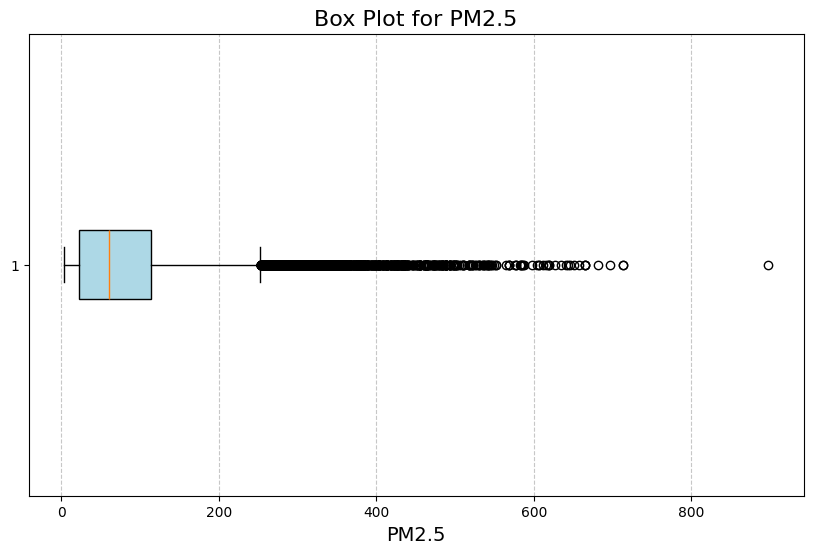

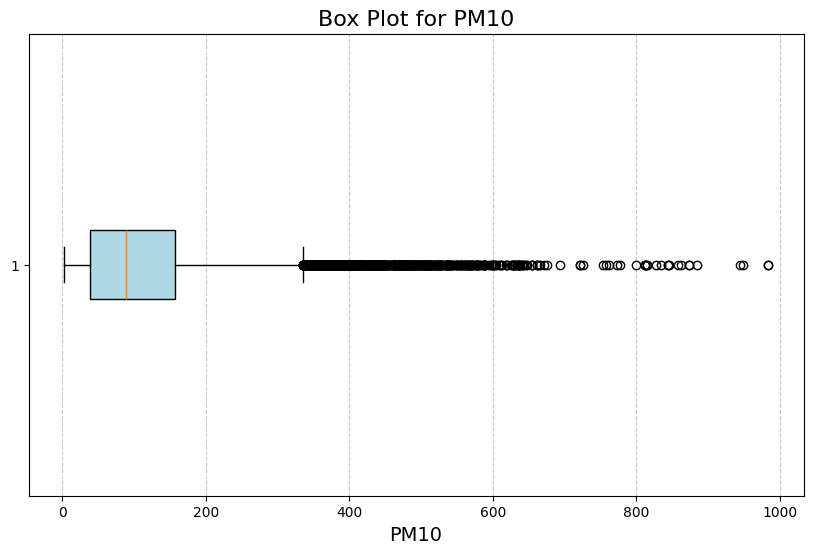

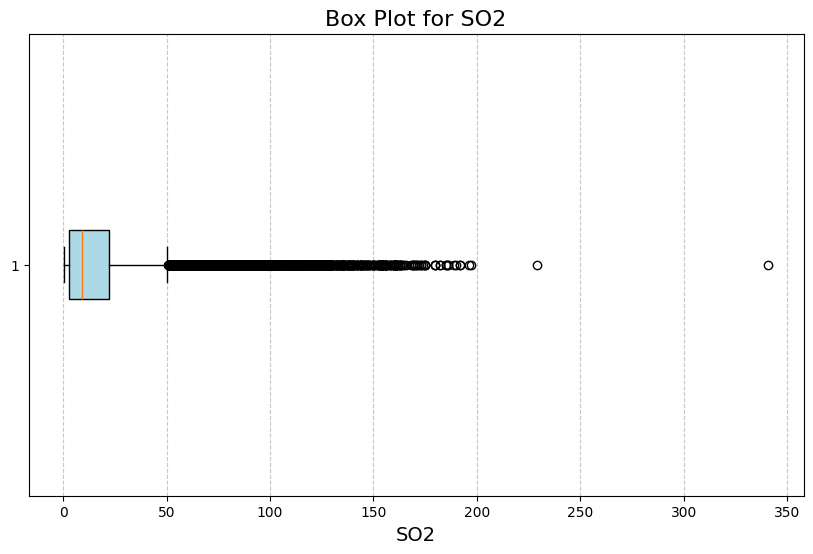

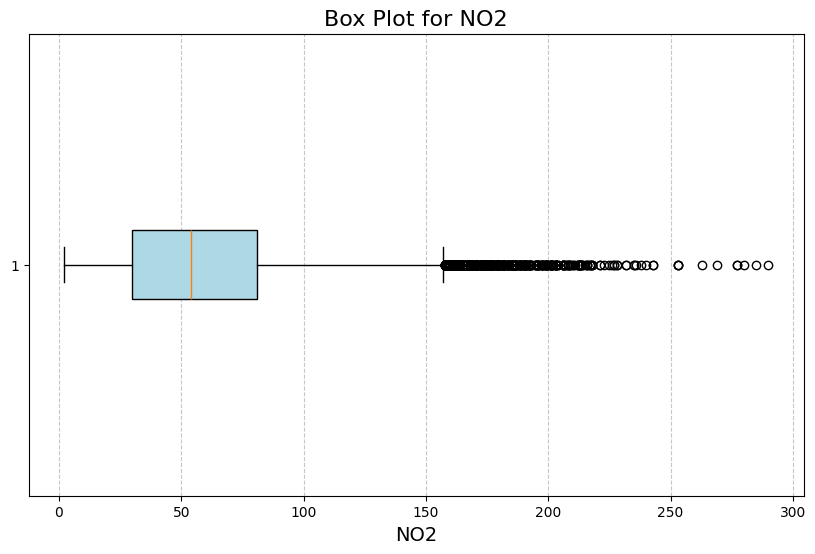

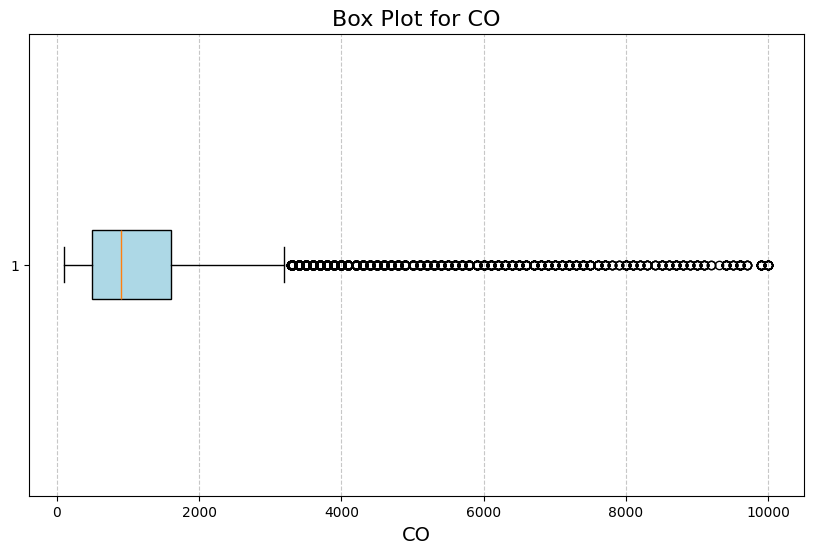

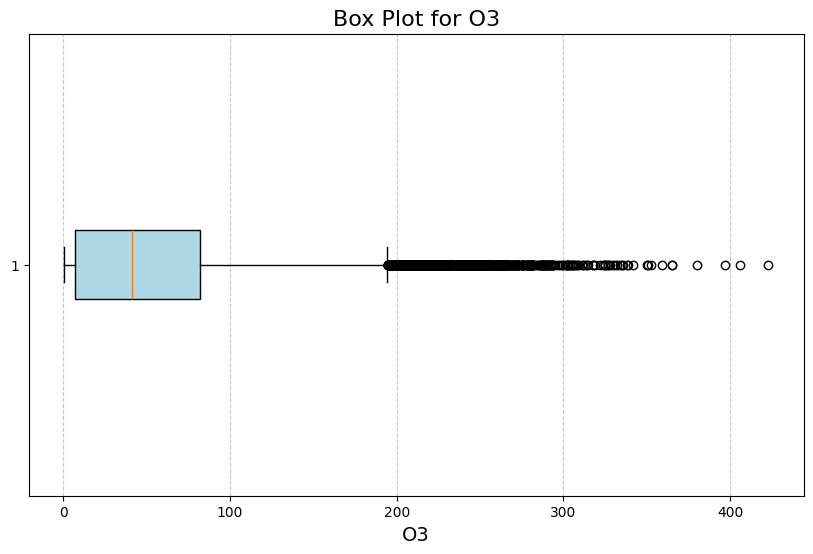

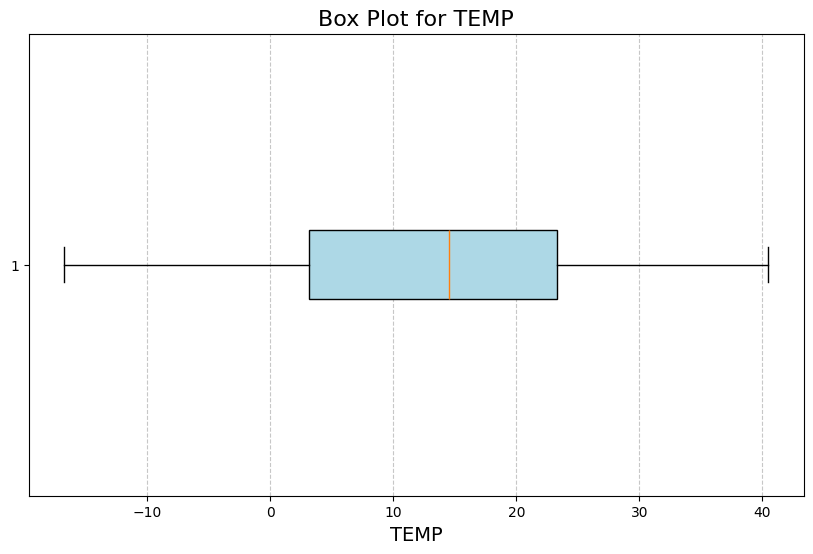

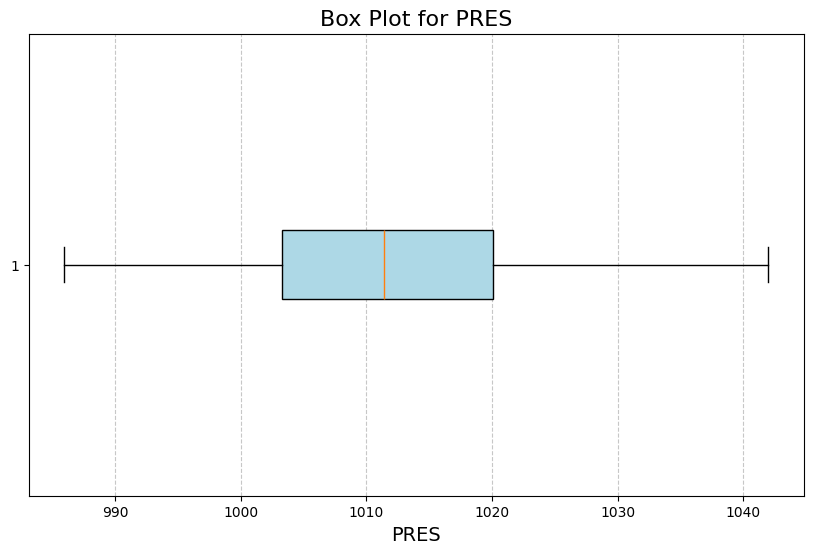

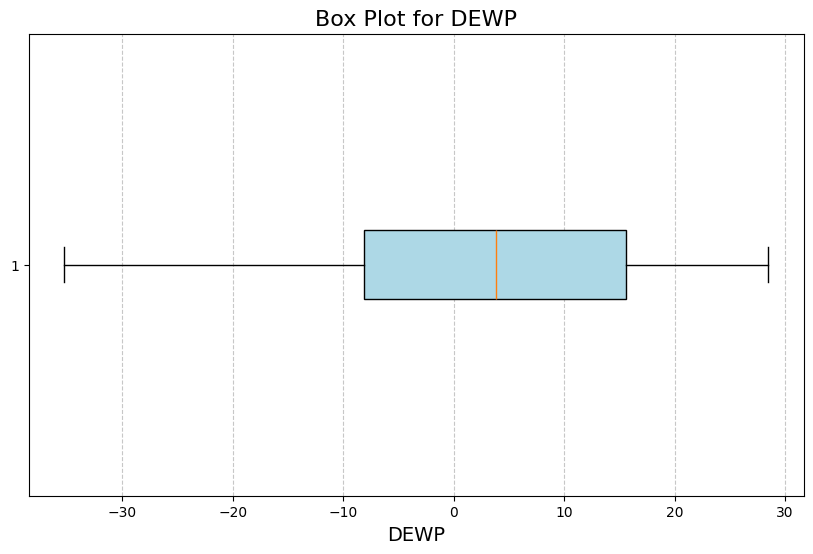

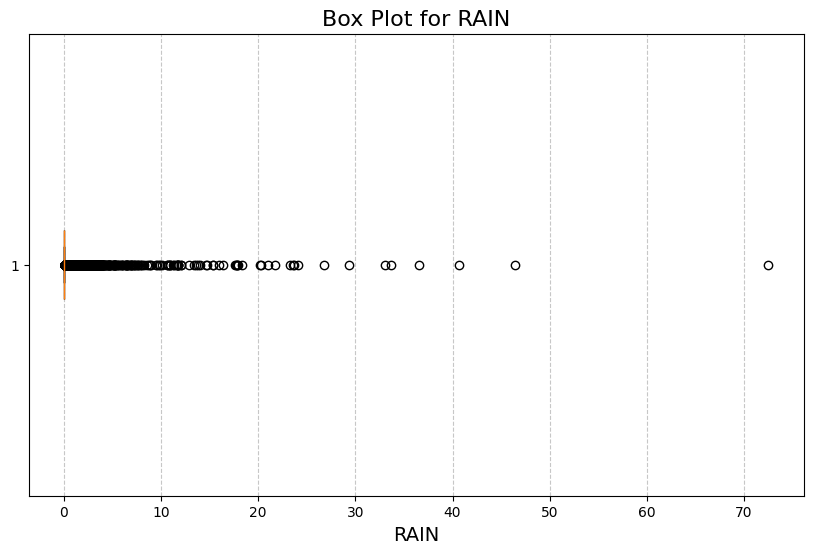

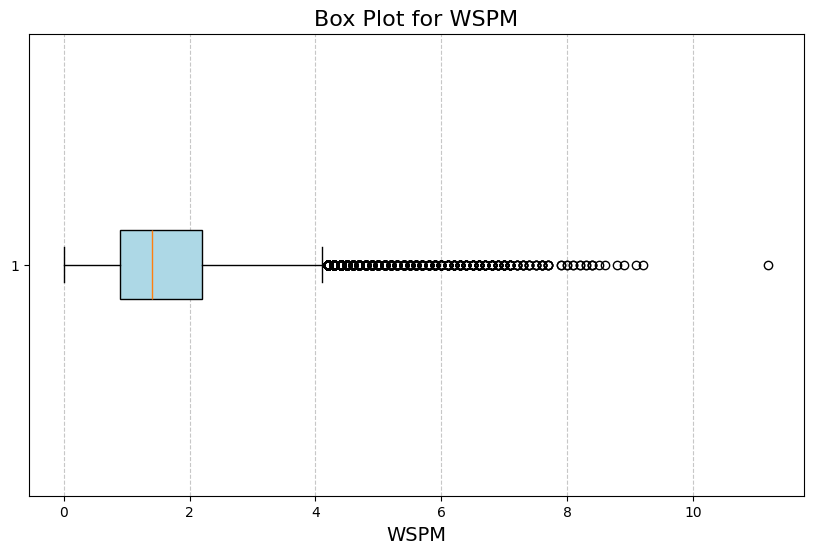

In [45]:
plot_boxplots(corrected_df[index_winsorized])

In [46]:
corrected_df[index_winsorized].describe()

,datetime,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,2015-03-01 11:30:00,83.163652,110.733262,17.573220,59.290826,1267.071954,55.184512,13.581908,1011.851716,3.120283,0.067383,1.708470
min,2013-03-01 00:00:00,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,2014-03-01 05:45:00,22.000000,38.000000,3.000000,30.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,2015-03-01 11:30:00,60.000000,88.000000,9.000000,54.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,2016-02-29 17:15:00,114.000000,157.000000,22.000000,81.000000,1600.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,2017-02-28 23:00:00,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000
std,NaN,82.290700,95.375762,22.819302,37.007696,1242.121599,57.582259,11.400761,10.404909,13.690615,0.909798,1.204171


In [47]:
outliers, non_outliers = detect_outliers_iqr(corrected_df[index_winsorized])
outliers.describe()

,datetime,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,9225,9225.000000,9225.000000,9225.000000,9225.000000,9225.000000,9225.000000,9225.000000,9225.000000,9225.000000,9225.000000,9225.000000
mean,2015-02-17 21:04:15.609756416,141.079924,176.176369,33.366031,72.378022,2170.682493,65.196935,11.201145,1012.528439,1.342645,0.256119,2.115057
min,2013-03-01 00:00:00,3.000000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,987.500000,-35.300000,0.000000,0.000000
25%,2014-02-04 22:00:00,47.000000,70.000000,5.000000,29.000000,700.000000,3.641400,0.600000,1004.400000,-8.100000,0.000000,1.000000
50%,2015-03-02 10:00:00,114.000000,156.000000,17.000000,66.000000,1600.000000,35.000000,9.100000,1013.000000,-0.800000,0.000000,1.500000
75%,2016-01-21 02:00:00,212.000000,256.000000,57.000000,107.000000,3300.000000,88.000000,21.300000,1020.800000,13.300000,0.000000,2.800000
max,2017-02-21 23:00:00,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1041.400000,27.800000,72.500000,11.200000
std,NaN,116.053195,130.920820,35.705717,49.515186,1906.362644,78.667774,12.128461,10.175540,12.991411,1.760141,1.654517


In [48]:
non_outliers.describe()

,datetime,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,25839,25839.000000,25839.000000,25839.000000,25839.000000,25839.000000,25839.000000,25839.000000,25839.000000,25839.000000,25839.0,25839.000000
mean,2015-03-05 14:54:15.451062528,62.486474,87.368865,11.934894,54.618456,944.466311,51.609891,14.431884,1011.610113,3.754932,0.0,1.563311
min,2013-03-01 03:00:00,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.300000,985.900000,-34.100000,0.0,0.000000
25%,2014-03-27 18:30:00,19.000000,33.000000,3.000000,31.000000,500.000000,9.000000,4.800000,1002.900000,-8.200000,0.0,0.900000
50%,2015-03-01 08:00:00,48.000000,74.000000,8.000000,52.000000,800.000000,42.000000,16.000000,1010.800000,5.400000,0.0,1.400000
75%,2016-03-19 21:30:00,90.000000,129.000000,17.000000,74.000000,1300.000000,79.000000,23.600000,1020.000000,16.300000,0.0,2.100000
max,2017-02-28 23:00:00,252.000000,335.000000,50.000000,157.000000,3200.000000,194.279400,40.100000,1042.000000,28.500000,0.0,4.100000
std,NaN,52.499810,64.422944,11.430822,30.005121,633.029871,47.346245,11.005621,10.475192,13.876935,0.0,0.954147


In [49]:
winsorized_df = winsorize_outliers(corrected_df[index_winsorized], lower_percentile=10, upper_percentile=90)
winsorized_df.describe(include='all')

,datetime,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.0,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5161,NaN,35064
mean,2015-03-01 11:30:00,74.994667,102.565583,14.763218,57.180984,1119.349618,49.851166,13.577286,1011.804441,3.296446,0.0,NaN,1.638954,NaN
min,2013-03-01 00:00:00,10.000000,18.000000,2.000000,16.000000,300.000000,2.000000,-1.900000,998.400000,-16.100000,0.0,NaN,0.500000,NaN
25%,2014-03-01 05:45:00,22.000000,38.000000,3.000000,30.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.0,NaN,0.900000,NaN
50%,2015-03-01 11:30:00,60.000000,88.000000,9.000000,54.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.0,NaN,1.400000,NaN
75%,2016-02-29 17:15:00,114.000000,157.000000,22.000000,81.000000,1600.000000,82.000000,23.300000,1020.100000,15.600000,0.0,NaN,2.200000,NaN
max,2017-02-28 23:00:00,188.700000,233.000000,45.000000,109.000000,2700.000000,133.000000,28.300000,1026.000000,20.400000,0.0,NaN,3.400000,NaN


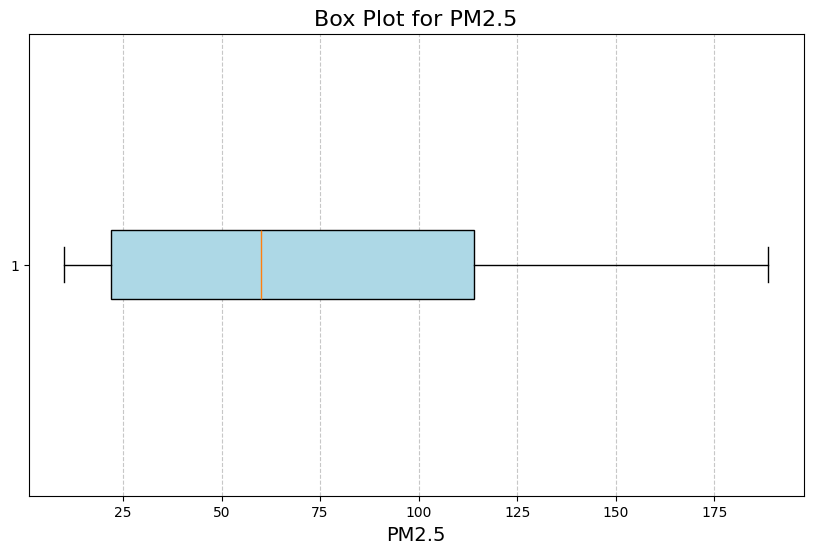

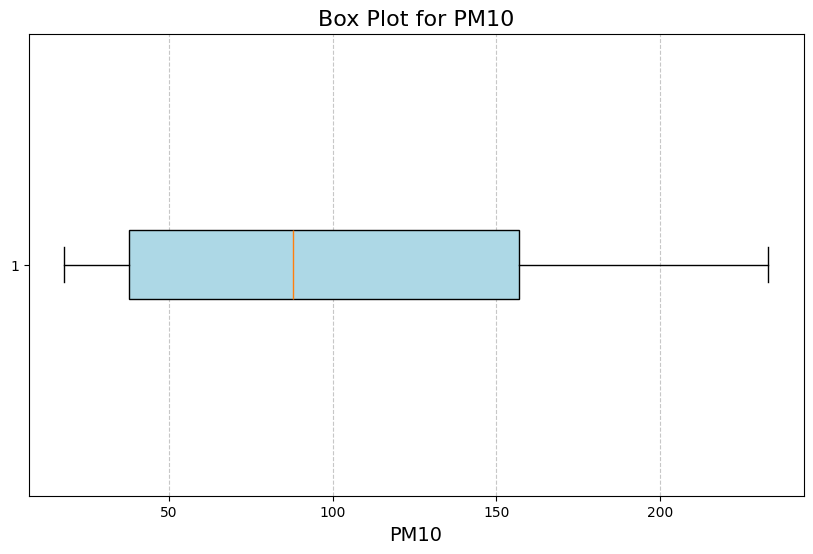

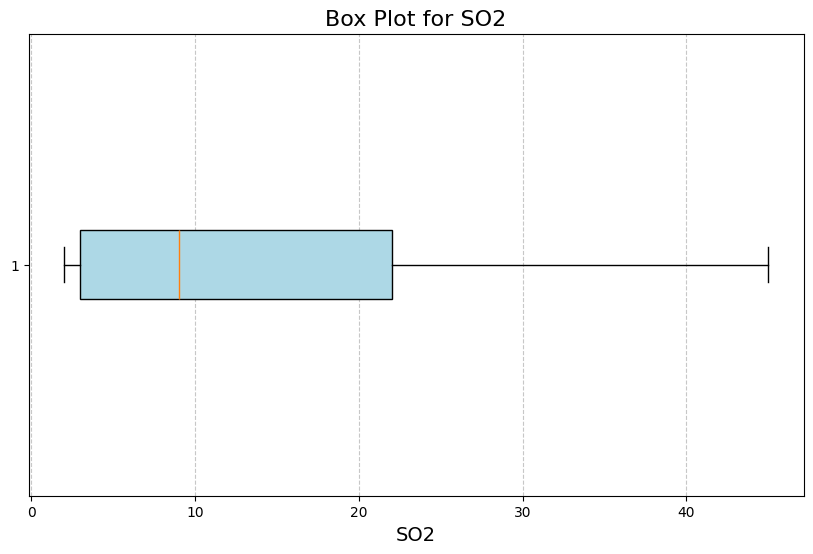

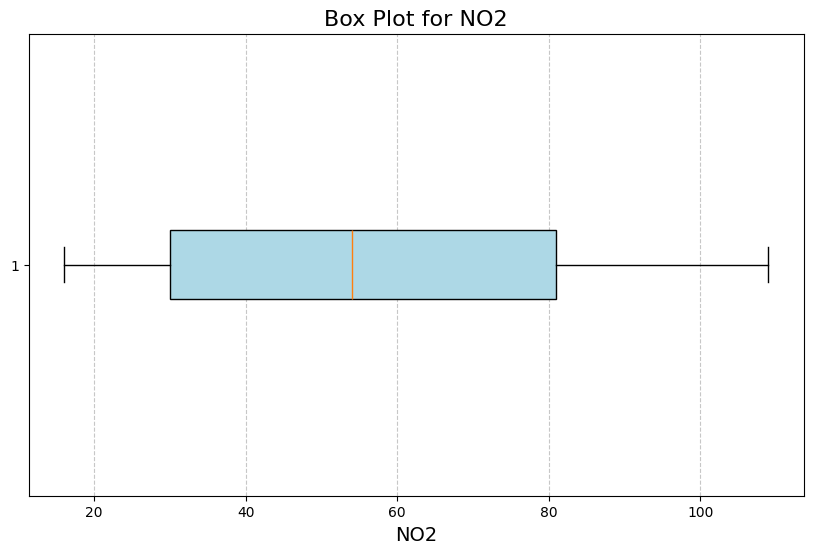

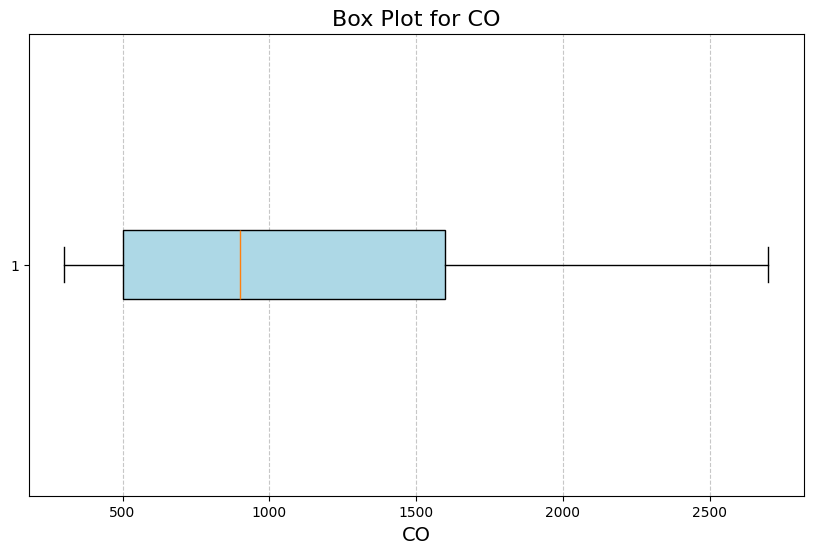

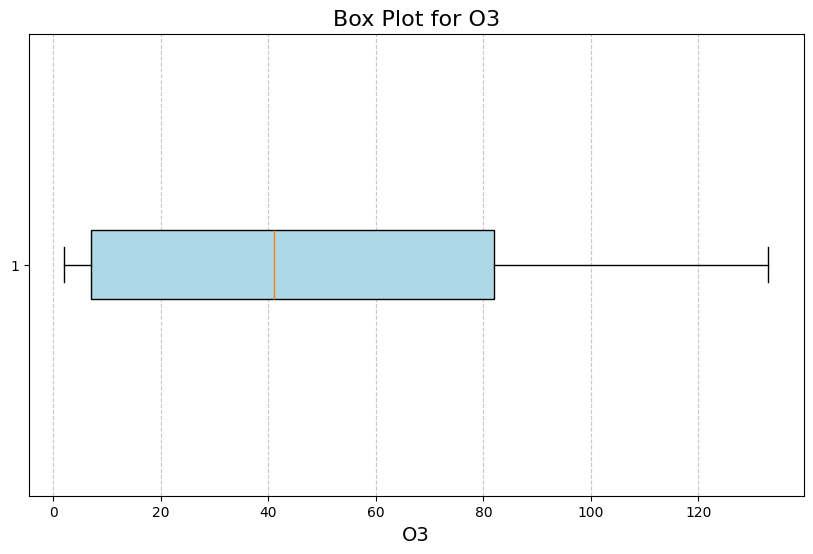

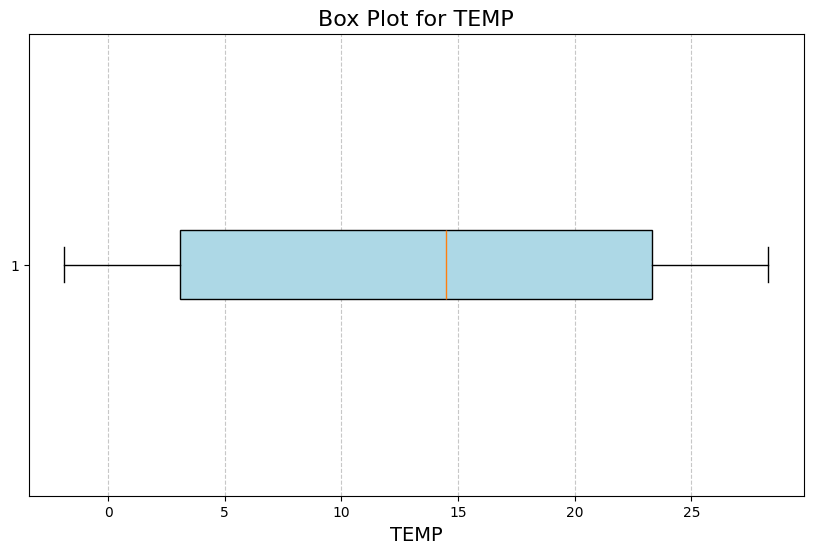

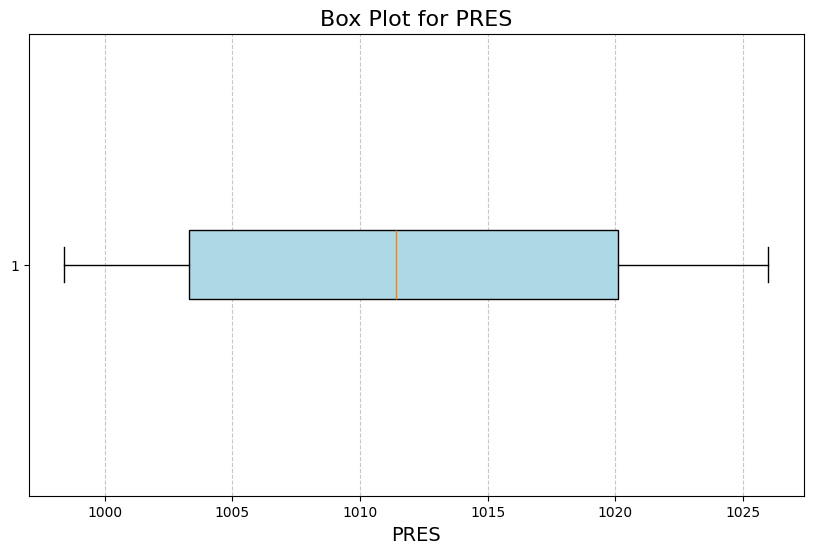

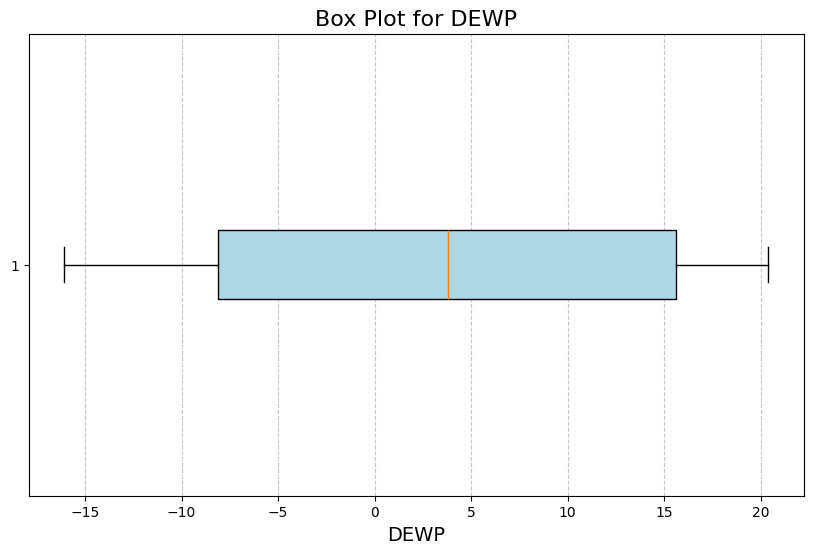

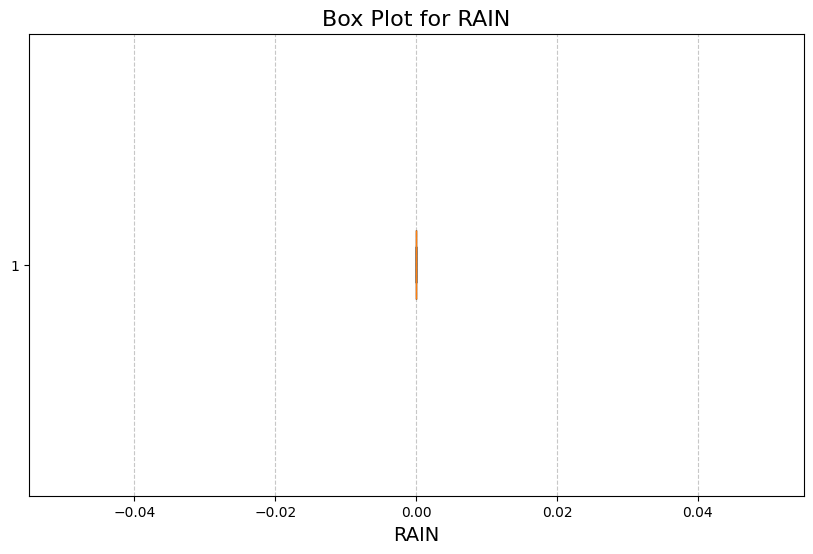

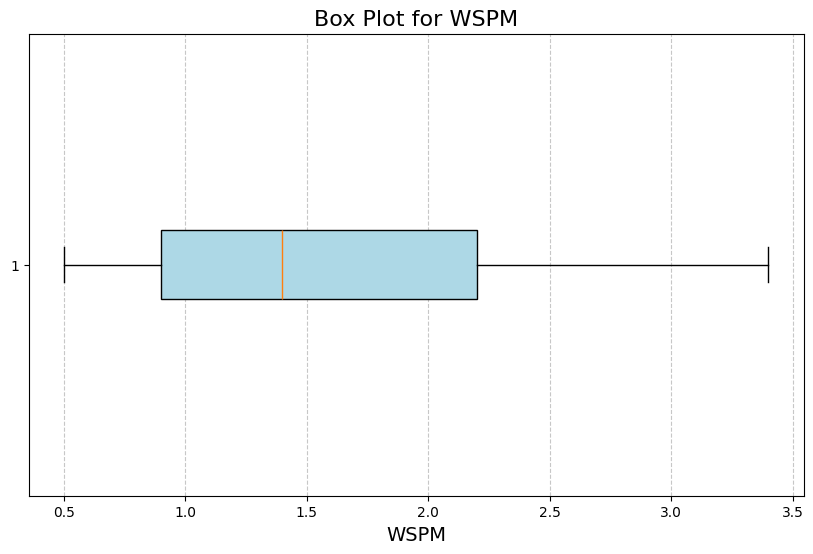

In [50]:
plot_boxplots(winsorized_df)

###### **Deal Outliers Data - All DataFrame**

In [51]:
all_winsorized_df = [winsorize_outliers(df, lower_percentile=10, upper_percentile=90) for df in corrected_df]

##### 🧶 **Check The Correlation**

In [52]:
def check_correlation(df):
    """
    Plots a correlation matrix heatmap for the numeric columns of a DataFrame.

    This function calculates the Pearson correlation coefficient between each
    pair of numeric columns, excluding specified non-numeric columns, and
    visualizes the correlation matrix as a heatmap. Correlation coefficients
    range from -1 to 1, with values closer to 1 or -1 indicating stronger correlations.
    - Positive values indicate a positive correlation.
    - Negative values indicate a negative correlation.

    Parameters:
    - df (pd.DataFrame): The input DataFrame containing numeric and non-numeric data.

    Returns:
    - None: This function only displays the heatmap and does not return any values.
    """

    # Drop column that not will use in make correlation matrix
    df_cor = df.drop(columns=['station', 'wd', 'datetime'])

    # Get correlation value and store in correlation variabel
    correlation_matrix = df_cor.corr()

    # Visualize the correlation value into correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix Heatmap')
    plt.show()

In [53]:
# Choose and set index to choose dataframe
# that will visualize from 0-11
index_correlation = 0

###### **Check Correlation Data - 1 DataFrame Example**

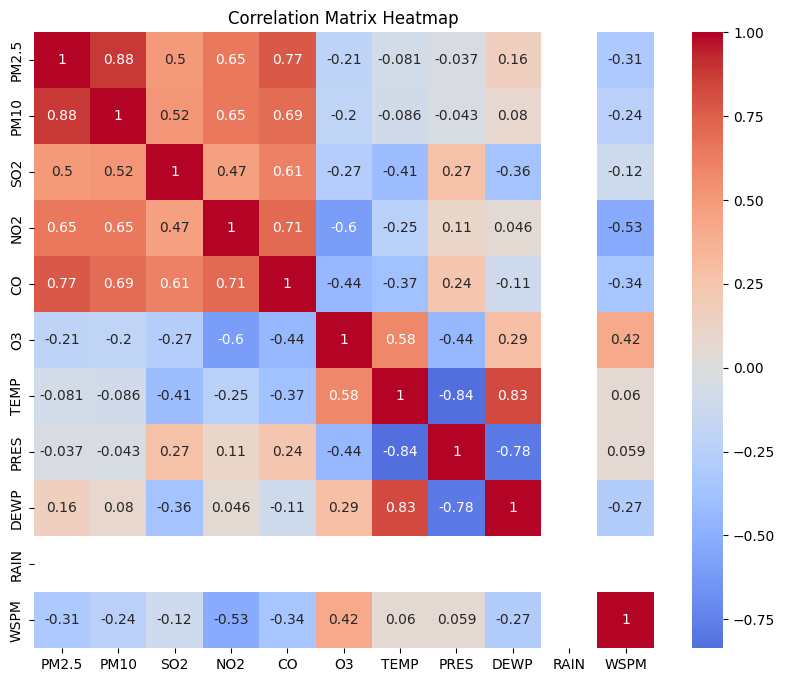

In [54]:
check_correlation(all_winsorized_df[index_correlation])

#### ⏩ **Insight Data Cleaning**

---

Setelah melakukan proses data cleaning dimulai dari proses mengubah format date menjadi lebih *compact*, mengatasi nilai *null* atau kosong, melakukan analisis lanjutan mengenai data *outlier* dan korelasi data didapatkan beberapa hal menarik sebagai berikut:

1. Pengubahan format tanggal membuat kolom menjadi lebih ringkas dan membantu mempermudah dalam analisis lanjutan, seperti digunakan saat proses menyelesaikan *null* value dengan membuat kolom datetime menjadi index dari datanya.

2. Menyelesaikan masalah *null* value sudah dapat mengatasi kekosongan data pada data yang bertipe numerik dan object. Untuk tipe numerik menggunakan metode interpolasi linear sedangkan untuk data tipe object menggunakan metode interpolasi *forward fill* digabungkan dengan *backward fill*.

3. Setelah data lengkap, analisis lanjutan yang bisa dilakukan adalah mengatasi data *outlier* dan pengecekan korelasi antar datanya. Untuk data outlier diatasi dengan metode winsoring untuk menggantikan nilai data berdasarkan dengan batas bawah dan batas atas percentil-nya. Dengan ini maka data *outlier* sudah dapat ditangai dengan baik, ini dapat dilihat dari visualisasi box-plot yang tidak menunjukan indikasi adanya data *outlier*.

4. Proses untuk pengecekan korelasi antara kolom juga dapat dilihat pada hasil *correlation matrix*. Pada matrik terdapat beberapa kolom, baik kolom parameter polusi dan kolom parameter pemicu polusi berkaitan satu sama lain walau kecil, untuk analisis lebih lanjut akan pada proses EDA nantinya.  

## ⌚ **EDA (Exploratory Data Analysis)**

EDA atau Exploratory Data Analysis adalah proses untuk menggali insight dari data yang digunakan untuk menjawab pertanyaan bisnis. Dalam proses EDA terdapat beberapa proses yakni tahap persiapan dan proses eksplorasi data.

### **1. Tahap Persiapan EDA**

In [55]:
selected_dfs = all_winsorized_df[:12]
final_df = pd.concat(selected_dfs, ignore_index=True)
final_df

,datetime,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,10.0,18.0,4.0,16.0,300.0,77.0,-0.7,1023.0,-16.1,0.0,NNW,3.4,Aotizhongxin
1,2013-03-01 01:00:00,10.0,18.0,4.0,16.0,300.0,77.0,-1.1,1023.2,-16.1,0.0,N,3.4,Aotizhongxin
2,2013-03-01 02:00:00,10.0,18.0,5.0,16.0,300.0,73.0,-1.1,1023.5,-16.1,0.0,NNW,3.4,Aotizhongxin
3,2013-03-01 03:00:00,10.0,18.0,11.0,16.0,300.0,72.0,-1.4,1024.5,-16.1,0.0,NW,3.1,Aotizhongxin
4,2013-03-01 04:00:00,10.0,18.0,12.0,16.0,300.0,72.0,-1.9,1025.2,-16.1,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,2017-02-28 19:00:00,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,2017-02-28 20:00:00,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,2017-02-28 21:00:00,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,2017-02-28 22:00:00,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


In [56]:
p_polution_final_df = final_df.drop(columns=['TEMP','PRES','DEWP','RAIN','wd','WSPM'])
pc_polution_final_df = final_df.drop(columns=['PM2.5','PM10','SO2','NO2','CO','O3'])

In [57]:
p_polution_final_df.head()

,datetime,PM2.5,PM10,SO2,NO2,CO,O3,station
0,2013-03-01 00:00:00,10.0,18.0,4.0,16.0,300.0,77.0,Aotizhongxin
1,2013-03-01 01:00:00,10.0,18.0,4.0,16.0,300.0,77.0,Aotizhongxin
2,2013-03-01 02:00:00,10.0,18.0,5.0,16.0,300.0,73.0,Aotizhongxin
3,2013-03-01 03:00:00,10.0,18.0,11.0,16.0,300.0,72.0,Aotizhongxin
4,2013-03-01 04:00:00,10.0,18.0,12.0,16.0,300.0,72.0,Aotizhongxin


In [58]:
pc_polution_final_df.head()

,datetime,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,-0.7,1023.0,-16.1,0.0,NNW,3.4,Aotizhongxin
1,2013-03-01 01:00:00,-1.1,1023.2,-16.1,0.0,N,3.4,Aotizhongxin
2,2013-03-01 02:00:00,-1.1,1023.5,-16.1,0.0,NNW,3.4,Aotizhongxin
3,2013-03-01 03:00:00,-1.4,1024.5,-16.1,0.0,NW,3.1,Aotizhongxin
4,2013-03-01 04:00:00,-1.9,1025.2,-16.1,0.0,N,2.0,Aotizhongxin


In [59]:
final_df.to_csv("dashboard/final_df.csv", index=False)

### **2. Tahap Eksplorasi Data**

#### 🥨 **Parameter Polusi**

Parameter polusi terdiri dari beberapa kolom yakni PM2.5, PM10, SO2, NO2, CO, dan O3. Keenam kolom ini menandakan bahwa pada suatu daerah memiliki kondisi udara yang baik atau tidak.

In [60]:
p_polution_final_df.describe()

,datetime,PM2.5,PM10,SO2,NO2,CO,O3
count,420768,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,2015-03-01 11:30:00.000001024,72.316103,96.895479,13.243638,48.546387,1112.089598,51.898433
min,2013-03-01 00:00:00,7.000000,12.000000,2.000000,3.000000,200.000000,2.000000
25%,2014-03-01 05:45:00,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000
50%,2015-03-01 11:30:00,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000
75%,2016-02-29 17:15:00,112.000000,146.000000,20.000000,69.000000,1500.000000,82.000000
max,2017-02-28 23:00:00,200.000000,241.000000,49.000000,115.000000,3000.000000,140.000000
std,NaN,58.694888,68.239038,13.535753,29.495267,761.175243,43.565006


In [61]:
p_polution_final_df.head()

,datetime,PM2.5,PM10,SO2,NO2,CO,O3,station
0,2013-03-01 00:00:00,10.0,18.0,4.0,16.0,300.0,77.0,Aotizhongxin
1,2013-03-01 01:00:00,10.0,18.0,4.0,16.0,300.0,77.0,Aotizhongxin
2,2013-03-01 02:00:00,10.0,18.0,5.0,16.0,300.0,73.0,Aotizhongxin
3,2013-03-01 03:00:00,10.0,18.0,11.0,16.0,300.0,72.0,Aotizhongxin
4,2013-03-01 04:00:00,10.0,18.0,12.0,16.0,300.0,72.0,Aotizhongxin


In [62]:
p_polution_final_df.groupby(by=['station']).agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'SO2': 'mean',
    'NO2': 'mean',
    'CO': 'mean',
    'O3': 'mean',
}).reset_index()

,station,PM2.5,PM10,SO2,NO2,CO,O3
0,Aotizhongxin,74.994667,102.565583,14.763218,57.180984,1119.349618,49.851166
1,Changping,64.336818,87.311693,12.292553,42.471796,1022.653947,52.731071
2,Dingling,59.880852,76.876822,9.896631,25.061630,819.833020,64.317859
3,Dongsi,78.191883,101.659657,15.847071,50.298012,1251.275724,52.380818
4,Guanyuan,75.087038,101.147827,14.665466,55.896797,1114.275838,49.923559
5,Gucheng,76.139619,111.296096,13.073336,53.783250,1226.511237,53.396375
6,Huairou,63.165891,85.400545,9.700515,30.163695,940.139659,55.098372
7,Nongzhanguan,76.775068,100.838746,15.787927,56.149332,1176.723163,53.173886
8,Shunyi,72.044059,91.230384,11.046389,42.744368,1073.886351,48.364832
9,Tiantan,74.620645,98.429657,11.725523,51.313714,1181.867870,50.866999


Dapat dilihat pada tabel diatas, terdapat total 12 kota di Beijing dengan 6 indikator kualitas dari udara nya. Secara sekilas, untuk persebaran nilai indikatornya cukup merata pada satu daerah dengan daerah yang lain, oleh karena itu, coba untuk mencari nilai maksimal dan minimal tiap indikator pada masing-masing daerah.

In [63]:
for col in p_polution_final_df.columns:
    if col not in ['station', 'datetime']:
      group_data = p_polution_final_df.groupby(by=['station'])[col].mean()
      max_station = group_data.idxmax()
      max_value = group_data.max()
      print(f"Kota Dengan Nilai {col} Tertinggi : {max_station}, Nilai: {max_value}")

      min_station = group_data.idxmin()
      min_value = group_data.min()
      print(f"Kota Dengan Nilai {col} Terendah : {min_station}, Nilai: {min_value}\n")

Kota Dengan Nilai PM2.5 Tertinggi : Dongsi, Nilai: 78.19188341318733
Kota Dengan Nilai PM2.5 Terendah : Dingling, Nilai: 59.8808521560575

Kota Dengan Nilai PM10 Tertinggi : Gucheng, Nilai: 111.29609571070043
Kota Dengan Nilai PM10 Terendah : Dingling, Nilai: 76.87682238193018

Kota Dengan Nilai SO2 Tertinggi : Dongsi, Nilai: 15.8470714122747
Kota Dengan Nilai SO2 Terendah : Huairou, Nilai: 9.70051492128679

Kota Dengan Nilai NO2 Tertinggi : Wanliu, Nilai: 63.96878848961898
Kota Dengan Nilai NO2 Terendah : Dingling, Nilai: 25.061629885352495

Kota Dengan Nilai CO Tertinggi : Dongsi, Nilai: 1251.2757243896874
Kota Dengan Nilai CO Terendah : Dingling, Nilai: 819.8330196212639

Kota Dengan Nilai O3 Tertinggi : Dingling, Nilai: 64.31785892083047
Kota Dengan Nilai O3 Terendah : Wanliu, Nilai: 41.749784599589326



Dari 6 indikator, yang memegang posisi 3 indikator tertinggi adalah daerah Dongsi dengan indikator PM2.5, SO2, dan CO tertinggi. Sedangkan daerah yang memegang indikator terrendah terbanyak adalah Dingling, dengan 4 indikatornya adalah PM2.5, PM10, NO2, dan CO.


In [64]:
daily_df = p_polution_final_df.copy()
daily_df.set_index('datetime', inplace=True)
daily_mean = daily_df.groupby('station').resample('D').mean().reset_index()
daily_mean.head()

,station,datetime,PM2.5,PM10,SO2,NO2,CO,O3
0,Aotizhongxin,2013-03-01,10.958333,18.625000,11.708333,24.958333,429.166667,63.875000
1,Aotizhongxin,2013-03-02,32.208333,44.708333,31.250000,66.625000,824.916667,29.750000
2,Aotizhongxin,2013-03-03,76.916667,120.541667,35.833333,79.916667,1616.500000,19.125000
3,Aotizhongxin,2013-03-04,23.416667,45.375000,23.208333,46.333333,604.166667,53.750000
4,Aotizhongxin,2013-03-05,142.745833,178.666667,45.000000,98.916667,2237.208333,68.458333


In [65]:
weekly_df = p_polution_final_df.copy()
weekly_df.set_index('datetime', inplace=True)
weekly_mean = weekly_df.groupby('station').resample('W').mean().reset_index()
weekly_mean.head()

,station,datetime,PM2.5,PM10,SO2,NO2,CO,O3
0,Aotizhongxin,2013-03-03,40.027778,61.291667,26.263889,57.166667,956.861111,37.583333
1,Aotizhongxin,2013-03-10,113.026190,156.398810,35.708333,79.059524,1710.589286,59.529762
2,Aotizhongxin,2013-03-17,128.386310,152.946429,35.625000,78.434524,1688.559524,65.720238
3,Aotizhongxin,2013-03-24,63.089286,89.005952,18.386905,54.196429,1075.565476,38.436337
4,Aotizhongxin,2013-03-31,102.745833,139.589286,30.101190,71.654762,1286.750000,27.626270


In [66]:
montly_df = p_polution_final_df.copy()
montly_df.set_index('datetime', inplace=True)
montly_mean = montly_df.groupby('station').resample('ME').mean().reset_index()
montly_mean.head()

,station,datetime,PM2.5,PM10,SO2,NO2,CO,O3
0,Aotizhongxin,2013-03-31,95.832796,127.401882,29.598118,69.513441,1393.575269,46.836718
1,Aotizhongxin,2013-04-30,61.640139,107.181944,21.131096,53.884716,906.336111,48.112808
2,Aotizhongxin,2013-05-31,80.356452,133.836022,25.745968,59.681452,870.120968,65.230969
3,Aotizhongxin,2013-06-30,99.096944,122.406944,14.077752,70.438529,1027.545833,58.811967
4,Aotizhongxin,2013-07-31,68.547715,85.502688,9.119910,55.018949,827.680108,61.414926


In [67]:
annual_df = p_polution_final_df.copy()
annual_df.set_index('datetime', inplace=True)
annual_mean = annual_df.groupby('station').resample('YE').mean().reset_index()
annual_mean.head()

,station,datetime,PM2.5,PM10,SO2,NO2,CO,O3
0,Aotizhongxin,2013-12-31,76.712337,107.539352,19.176016,61.469473,1077.474809,43.256985
1,Aotizhongxin,2014-12-31,81.977694,113.596324,17.073116,61.568162,1119.452055,44.008219
2,Aotizhongxin,2015-12-31,73.275320,102.813333,12.851176,58.077180,1194.726027,56.276027
3,Aotizhongxin,2016-12-31,68.272222,88.746812,10.105191,47.529827,1057.729964,55.179189
4,Aotizhongxin,2017-12-31,75.224576,92.718927,18.310734,62.123588,1251.836158,47.399718


Setelah mengidentifikasi secara kasar mengenai daerah dengan indikator tertinggi dan terendah, dalam data parameter polusi juga dapat diubah menjadi rata-rata data dalam satuan jam, hari, minggu, bulan dan tahun. Ini memberikan ruang analisis menjadi lebih beragam pada skala yang lebih kecil.

#### 🥨 **Parameter Pemicu Polusi**

Parameter pemicu polusi adalah beberapa parameter pendukung yang dapat memicu sebuah polusi seperti temperatur (TEMP), tekanan udara(PRES), titik embun (DEWP), tingkat curah hujan (RAIN), arah angin (wd), dan kecepatan angin (WSP).

In [68]:
pc_polution_final_df.describe(include='all')

,datetime,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768,420768.000000,420768.000000,420768.000000,420768.0,420768,420768.000000,420768
unique,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,43653,NaN,35064
mean,2015-03-01 11:30:00.000001024,13.530074,1010.703641,2.637231,0.0,NaN,1.642726,NaN
min,2013-03-01 00:00:00,-3.700000,994.500000,-17.400000,0.0,NaN,0.200000,NaN
25%,2014-03-01 05:45:00,3.100000,1002.300000,-8.900000,0.0,NaN,0.900000,NaN
50%,2015-03-01 11:30:00,14.500000,1010.400000,3.000000,0.0,NaN,1.400000,NaN
75%,2016-02-29 17:15:00,23.300000,1019.000000,15.100000,0.0,NaN,2.200000,NaN
max,2017-02-28 23:00:00,28.400000,1027.000000,20.500000,0.0,NaN,3.700000,NaN


In [69]:
pc_polution_final_df.head(10)

,datetime,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,-0.7,1023.0,-16.1,0.0,NNW,3.4,Aotizhongxin
1,2013-03-01 01:00:00,-1.1,1023.2,-16.1,0.0,N,3.4,Aotizhongxin
2,2013-03-01 02:00:00,-1.1,1023.5,-16.1,0.0,NNW,3.4,Aotizhongxin
3,2013-03-01 03:00:00,-1.4,1024.5,-16.1,0.0,NW,3.1,Aotizhongxin
4,2013-03-01 04:00:00,-1.9,1025.2,-16.1,0.0,N,2.0,Aotizhongxin
5,2013-03-01 05:00:00,-1.9,1025.6,-16.1,0.0,N,3.4,Aotizhongxin
6,2013-03-01 06:00:00,-1.9,1026.0,-16.1,0.0,NNE,2.5,Aotizhongxin
7,2013-03-01 07:00:00,-1.6,1026.0,-16.1,0.0,NNW,3.4,Aotizhongxin
8,2013-03-01 08:00:00,0.1,1026.0,-16.1,0.0,NNW,3.4,Aotizhongxin
9,2013-03-01 09:00:00,1.2,1026.0,-16.1,0.0,N,2.6,Aotizhongxin


In [70]:
pc_polution_final_df.groupby(by='wd').agg({
    'station' : 'nunique',
    'TEMP': 'mean',
    'PRES': 'mean',
    'DEWP': 'mean',
    'RAIN': 'mean',
    'WSPM': 'mean',
}).reset_index()

,wd,station,TEMP,PRES,DEWP,RAIN,WSPM
0,E,12,14.005947,1010.197589,5.475179,0.0,1.330957
1,ENE,12,12.063523,1011.967432,3.594076,0.0,1.337788
2,ESE,12,15.289022,1009.253211,6.065047,0.0,1.550738
3,N,12,11.699240,1011.502805,0.952910,0.0,1.548401
4,NE,12,11.124314,1012.757428,2.176389,0.0,1.397329
5,NNE,12,12.177695,1011.810424,2.187621,0.0,1.490992
6,NNW,12,10.836077,1011.909900,-2.016331,0.0,1.918647
7,NW,12,10.131933,1012.560509,-3.246869,0.0,2.077069
8,S,12,18.033154,1008.183076,6.023889,0.0,1.714364
9,SE,12,15.797759,1009.511123,5.401192,0.0,1.533972


Dapat dilihat pada tabel, untuk arah mata angin terdapat pada semua daerah di beijing dengan total ada 15 arah mata angin. Nilai pada indikator rain menunjukkan nilai 0 untuk semua data sehingga informasi yang bisa digali tidak ada, Ini juga sama dengan indikator station yang menunjukkan kesamaan data pada semua indikator.

Selain itu, pada tabel sebelumya, arah mata angin berubah-ubah di tiap jamnya.

In [71]:
for col in pc_polution_final_df.columns:
    if col not in ['station', 'datetime', 'wd', 'RAIN']:
      group_data = pc_polution_final_df.groupby(by=['wd'])[col].mean()
      max_station = group_data.idxmax()
      max_value = group_data.max()
      print(f"Arah Mata Angin Dengan Nilai {col} Tertinggi : {max_station}, Nilai: {max_value}")

      min_station = group_data.idxmin()
      min_value = group_data.min()
      print(f"Kota Dengan Nilai {col} Terendah : {min_station}, Nilai: {min_value}\n")

Arah Mata Angin Dengan Nilai TEMP Tertinggi : SSW, Nilai: 18.258342740865256
Kota Dengan Nilai TEMP Terendah : NW, Nilai: 10.131932606550206

Arah Mata Angin Dengan Nilai PRES Tertinggi : NE, Nilai: 1012.7574275882233
Kota Dengan Nilai PRES Terendah : SSE, Nilai: 1008.067256637168

Arah Mata Angin Dengan Nilai DEWP Tertinggi : SSE, Nilai: 6.478298855757849
Kota Dengan Nilai DEWP Terendah : NW, Nilai: -3.246869295363271

Arah Mata Angin Dengan Nilai WSPM Tertinggi : NW, Nilai: 2.0770688815869542
Kota Dengan Nilai WSPM Terendah : E, Nilai: 1.330957011602173



Dapat dilihat pada hasil perulangan diatas, didapatkan bahwa arah mata angin NW mendapatkan nilai terendah pada indikator TEMP dan DEWP, lalu indikator tertinggi pada WSPM. Lalu ada juga arah mata angin SSE yang menjadi terendah di PRES dan tertinggi di DEWP.

#### 🥨 **Korelasi Antar Parameter**

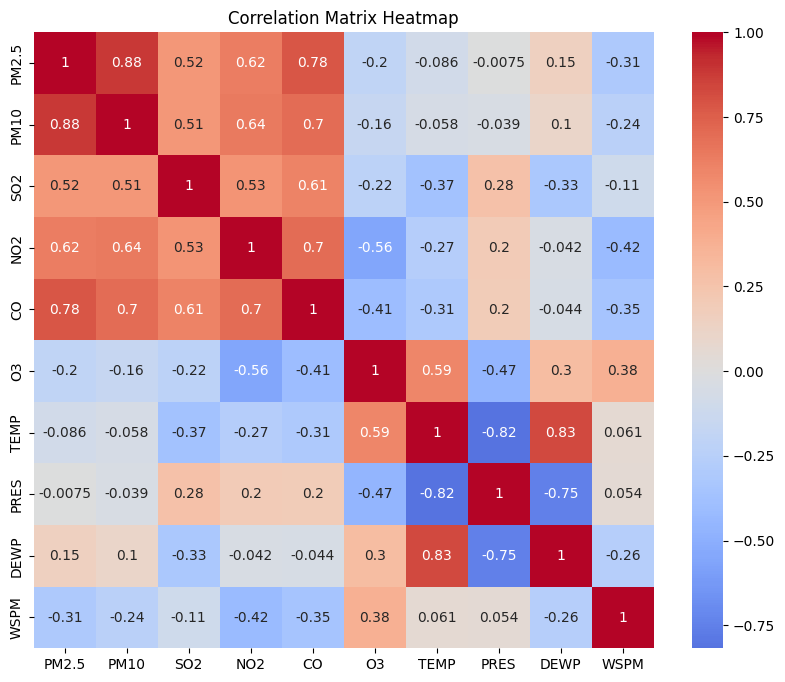

In [72]:
final_df.drop(columns=['RAIN'], inplace=True)
check_correlation(final_df)

Secara keseluruhan, parameter polusi saling berkaita kuat antara satu dengan yang lainnya, sedangkan parameter pemicu polusi tidak demikian. Beberapa hubungan antar parameter seperti indikator PM2.5 dan PM10 berhubungan sangat lemah pada indikator titik embun (DEWP), lalu indikator SO2, NO2, dan CO berhubungan lemah juga dengan indikator tekanan angin (PRES). Namum indikator O3 berhubungan cukup kuat pada 2 indikator suhu (TEMP) dan kecepatan angin (WSPM).

Jika melihat pada bagian parameter pemicu polusi, hanya indikator temperatur (TEMP) berhubungan kuat dengan indikator lainnya yakni indikator titik embun (DEWP).

#### 🥨 **Geospatial Analysis**

In [73]:
def validate_inputs(year, month, day, hour):
    """
    Validates the user input filters for year, month, day, and hour.

    This function checks that the necessary filters are specified for each level
    of time filtering. The user must provide filters in a logical sequence:
    - Year is required if Month or Day are specified.
    - Month is required if Day is specified.
    - Day is required if Hour is specified.

    Parameters:
    - year (int or None): The selected year for filtering.
    - month (int or None): The selected month for filtering.
    - day (int or None): The selected day for filtering.
    - hour (int or None): The selected hour for filtering.

    Raises:
    - ValueError: If the required filters are not specified in a valid order.
    """

    # Ensure that day is specified only if month and year are provided
    if day is not None and (month is None or year is None):
        raise ValueError("To filter by day, specify both year and month.")

    # Ensure that month is specified only if year is provided
    if month is not None and year is None:
        raise ValueError("To filter by month, specify the year.")

    # Ensure that hour is specified only if day, month, and year are provided
    if hour is not None and (day is None or month is None or year is None):
        raise ValueError("To filter by hour, specify year, month, and day.")

In [74]:
# Step 1: Define Stations Coordinates
# Station coordinates get from outsources like google maps and google earth.
# There is still have some issue that coordinat maybe wrong.
stations_coords = {
    "Aotizhongxin": (41.731242, 123.456778),
    "Changping": (40.221, 116.2312),
    "Dingling": (40.28998423518348, 116.2393424781757),
    "Dongsi": (40.10208908941478, 116.31657335910373),
    "Guanyuan": (39.94113871141321, 116.3610710753842),
    "Gucheng": (39.91270053243136, 116.1868698799306),
    "Huairou": (43.06043347888646, 117.46726428196578),
    "Nongzhanguan": (39.93978579546827, 116.46859787734736),
    "Shunyi": (40.151287025024715, 116.69280368021326),
    "Tiantan": (39.88189413732897, 116.42047003643812),
    "Wanliu": (39.99843210685499, 116.25774299569612),
    "Wanshouxigong": (39.90816416629832, 116.26439549963654)
}

# Step 2: Make Visualization that According to Spesific Date Location
# This step purpose to make filter based on year, month, day, and hour with
# level of filter is Year -> Month -> Day -> Hour.
selected_year = 2016
selected_month = 11
selected_day = None
selected_hour = None

# Step 3: Define a Function that Validate the Users Input
# This step crucial to make rank filter to make spesific location
# visualization later.
validate_inputs(selected_year, selected_month, selected_day, selected_hour)

# Step 4: Prepare DataFrame with Coordinates
spatial_df = final_df.copy()
spatial_df["latitude"] = spatial_df["station"].map(lambda x: stations_coords[x][0])
spatial_df["longitude"] = spatial_df["station"].map(lambda x: stations_coords[x][1])
spatial_df["datetime"] = pd.to_datetime(spatial_df["datetime"])

# Step 5: Filter the Data According the User Input
# At this section, users input are the variable that not None.
# The filter work is based on rank filter first by year until hour.
filtered_df = spatial_df.copy()
if selected_year is not None:
    filtered_df = filtered_df[filtered_df["datetime"].dt.year == selected_year]
if selected_month is not None:
    filtered_df = filtered_df[filtered_df["datetime"].dt.month == selected_month]
if selected_day is not None:
    filtered_df = filtered_df[filtered_df["datetime"].dt.day == selected_day]
if selected_hour is not None:
    filtered_df = filtered_df[filtered_df["datetime"].dt.hour == selected_hour]

# Step 6: Determine Grouping and Hover Columns for Visualization
# This step is crucial to make a new dataframe that spesific for
# visualization later, so the data is small column that include
# station name, latitude, longitude, and rank filter selection.
group_cols = ["station", "latitude", "longitude"]
if selected_hour is not None:
    filtered_df.loc[:, "hour"] = filtered_df["datetime"].dt.hour
    group_cols = ["hour"] + group_cols
    hover_cols = ["hour", "PM2.5"]
elif selected_day is not None:
    filtered_df.loc[:, "day"] = filtered_df["datetime"].dt.day
    group_cols = ["day"] + group_cols
    hover_cols = ["day", "PM2.5"]
elif selected_month is not None:
    filtered_df.loc[:, "month"] = filtered_df["datetime"].dt.month
    group_cols = ["month"] + group_cols
    hover_cols = ["month", "PM2.5"]
elif selected_year is not None:
    filtered_df.loc[:, "year"] = filtered_df["datetime"].dt.year
    group_cols = ["year"] + group_cols
    hover_cols = ["year", "PM2.5"]

# Step 7: Group and Aggregate Variabel PM2.5
# This step will use example of 1 variabel for fast and less computation
# visualization. The groupping dataframe will accordding to level rank
# that input by users.
filtered_df = (
    filtered_df.groupby(group_cols)
    .agg({"PM2.5": "mean"})
    .reset_index()
)

# Step 8: Plot the Visualization on the Map Using Ploty
fig = px.scatter_mapbox(
    filtered_df,
    lat="latitude",
    lon="longitude",
    color="PM2.5",
    size="PM2.5",
    hover_name="station",
    hover_data=hover_cols,
    mapbox_style="carto-positron",
    title="Time-Series Geospatial Data",
    zoom=5,
)

fig.show()

Dapat dilihat pada gambar peta diatas, ada beberapa titik lokasi yang memiliki perbedaan warna titik pada satu daerah dengan daerah yang lainnya. Perbedaan warna ini dipengaruhi oleh tingkat konsentrasi parameter polusi PM2.5 nya pada suatu daerah. Semakin pekat maka semakin tinggi, sedangkan sebaliknya semakin cerah/terang maka semakin rendah.

### ⏩ **Insight EDA (Eksploratory Data Analysis)**

Secara keseluruhan dalam proses ekploratory dibagi menjadi 2 tahap yakni tahapan persiapan dan eksplorasi. Untuk tahap persiapan dilakukan persiapan data dengan menggabungkan semua dataframe daerah menjadi satu untuk memudahkan proses analisis. Lalu, membagi kembali menjadi 2 dataframe dengan 2 kategori berbeda yakni : Data Parameter Polusi dan Data Parameter Pemicu Polusi.

- Pada hasil eksplorasi data parameter polusi didapatkan banyak hal terkait dengan daerah Dongsi yang menjadi pemilik indikator tertinggi yakni pada PM2.5, SO2, dan CO, sedangkan daerah Dingling dengan paling banyak indikator polusi terendah yakni PM2.5, PM10, NO2, dan CO.

- Pada eksplorasi parameter polusi juga didapatkan bahwa data dapat diubah dengan ukuran dalam satuan jam, hari, minggu, bulan, dan tahun. Dengan ini menandakan bisa membuat visualisasi yang mendetail dan rinci dalam implementasi nanti.

- Dilanjutkan dengan proses eksplorasi parameter pemicu polusi, didapatkan bahwa indikator station dan curah hujan (RAIN) tidak memiliki perlakuan yang berbeda untuk data jadi dapat dihilangkan.

- Selain itu didapatkan juga arah mata angin (wd) yang memiliki nilai tertinggi dan terendah terdapat pada arah mata angin SSE dan NW.

- Selanjutnya adalah melihat korelasi data setelah digabungkan dengan menghilangkan indikator curah hujan (RAIN) yang tidak berdampak signifikan. Didapatkan bahwa parameter polusi saling berhubungan antara satu sama lain, sedangkan parameter pemicu polusi yang berhubungan dengan baik hanya indikator temperatur (TEMP) dengan indikator titik embun (DEWP).

- Yang terakhir adalah analisis tambahan pada analisis geospasial menggunakan ploty. Pada analisis ini bertujuan untuk melihat perbandingan nilai variabel PM2.5 pada masing-masing daerah jika dipetakan dalam ruang spasial. Untuk variabel bisa digunakan yang lain seperti PM10, dan lainnya agar visualisasi menjadi lebih mendetail.



## 💬 **Data Visualization dan Explanatory**

Pada tahapan Data Visualization dan Explanatory ini akan menjelaskan insight yang ditemukan pada data untuk menjawab pertanyaan bisnis yang sudah diajukan sebelumnya, untuk pertanyaan bisnisnya sebagai berikut:

1. Bagaimana tren polusi udara pada masing-masing daerah di Beijing?
2. Kapan waktu udara terparah terjadi di masing-masing daerah di Beijing?
3. Apakah ada korelasi antar parameter pemicu (TEMP, DEWP, RAIN, Wd, WSPM) dengan parameter polusi (PM2.5, PM10, SO2, NO2, CO, O3)? Jika ada, maka bagaimana korelasinya?

Ketiga pertanyaan ini akan dijawab dalam 3 segmen berbeda dengan segmen terakhir adalah kesimpulan akhir dari Data Visualization dan Explanatory.

Untuk dataframe yang digunakan adalah `final_df`, `p_polution_final_df`, dan `pc_polution_final_df`.

### **Pertanyaan 1: Bagaimana tren polusi udara pada masing-masing daerah di Beijing?**

In [114]:
def aggregate_data(df, visualization_type, component_date={'year': None, 'month': None, 'days': None}):
    """
    Aggregates the given DataFrame based on the specified visualization type (Annual, Monthly, Daily, or Hourly).

    This function computes aggregated statistics (mean) on air quality data, grouped by time-based components
    such as year, month, day, or hour. The function can be customized to aggregate data for a specific year,
    month, or day if necessary.

    Parameters:
    - df : pandas.DataFrame
        The input DataFrame containing air quality data. Must include a 'datetime' column and pollutant data columns
        (e.g., 'PM2.5', 'PM10').

    - visualization_type : str
        The type of aggregation to perform. Accepted values are:
        - 'Annual' : Aggregates data by year.
        - 'Monthly' : Aggregates data by month, optionally for a specific year.
        - 'Daily' : Aggregates data by day, optionally for a specific month and year.
        - 'Hours' : Aggregates data by hour, optionally for a specific day, month, and year.

    - component_date : dict, optional (default is {'year': None, 'month': None, 'days': None})
        A dictionary specifying the specific year, month, and day for monthly, daily, and hourly aggregations.
        The dictionary may include:
        - 'year' : The specific year for monthly, daily, or hourly aggregation.
        - 'month' : The specific month for daily or hourly aggregation.
        - 'days' : The specific day for hourly aggregation.
        If not provided, the function will aggregate based on all available data.

    Returns:
    - agg_df : pandas.DataFrame
        The aggregated DataFrame based on the chosen visualization type. The data is grouped by relevant time units
        (e.g., year, month, day, or hour), and the mean of each pollutant is computed for each group.

    - id_vars : list
        A list of columns used as identifier variables for the aggregation. These columns depend on the selected
        aggregation type (e.g., ['station', 'year'] for annual aggregation).

    - labels : list
        A list containing the name of the time unit used in the aggregation, along with its descriptive label
        (e.g., ['year', 'Year']).

    Raises:
    - ValueError : If 'datetime' column is missing in the DataFrame.
    - ValueError : If an invalid 'visualization_type' is provided.
    - ValueError : If required values for year, month, or day are missing when performing monthly, daily, or hourly aggregation.
    """

    # Raise Value Error if datetime Column not present.
    if 'datetime' not in df.columns:
      raise ValueError("'datetime' column is missing in the DataFrame.")

    # Detect Year, Month, Day, and Hour
    df.loc[:, 'year'] = df['datetime'].dt.year
    df.loc[:, 'month'] = df['datetime'].dt.month
    df.loc[:, 'day'] = df['datetime'].dt.day
    df.loc[:, 'hour'] = df['datetime'].dt.hour

    # Detect Unique Component Datetime
    unique_years = df['year'].nunique(),
    unique_months = df['month'].nunique(),
    unique_days = df['day'].nunique(),
    unique_hours = df['hour'].nunique()

    # Initialize variables
    agg_df = None
    id_vars = []
    labels = []

    # Use match-case for aggregation
    match visualization_type:
        case 'Annual':
            agg_df = df.groupby(['station', 'year']).mean().reset_index()
            id_vars = ['station', 'year']
            labels = ['year', 'Year']

        # Case for Single Year and More than One Year
        case 'Monthly' if df['year'].nunique() == 1:
            agg_df = df.groupby(['station', 'month']).mean().reset_index()
            id_vars = ['station', 'month']
            labels = ['month', 'Month']
        case 'Monthly':
            if component_date['year'] is None:
                raise ValueError(f"Year is required for monthly aggregation.")
            selected_year = component_date['year']
            agg_df = df[df['year'] == selected_year].groupby(['station', 'month']).mean().reset_index()
            id_vars = ['station', 'month']
            labels = ['month', 'Month']

        # Case for Single Month and More than One Months
        case 'Daily' if df['month'].nunique() == 1:
            agg_df = df.groupby(['station', 'day']).mean().reset_index()
            id_vars = ['station', 'day']
            labels = ['day', 'Day']
        case 'Daily':
            if component_date['year'] is None or component_date['month'] is None:
                raise ValueError(f"Year and Month are required for daily aggregation.")
            selected_year = component_date['year']
            selected_month = component_date['month']
            agg_df = df[(df['year'] == selected_year) & (df['month'] == selected_month)].groupby(['station', 'day']).mean().reset_index()
            id_vars = ['station', 'day']
            labels = ['day', 'Day']

        # Case for Single Day and More than One Days
        case 'Hours' if df['day'].nunique() == 1:
            agg_df = df.groupby(['station', 'hour']).mean().reset_index()
            id_vars = ['station', 'hour']
            labels = ['hour', 'Hour']
        case 'Hours':
            if component_date['year'] is None or component_date['month'] is None or component_date['days'] is None:
                raise ValueError(f"Year, Month, and Day are required for hourly aggregation.")
            selected_year = component_date['year']
            selected_month = component_date['month']
            selected_day = component_date['days']
            agg_df = df[(df['year'] == selected_year) & (df['month'] == selected_month) & (df['day'] == selected_day)].groupby(['station', 'hour']).mean().reset_index()
            id_vars = ['station', 'hour']
            labels = ['hour', 'Hour']

        # Case for if all case above not match
        case _:
            raise ValueError("Invalid visualization type. Choose from 'Annual', 'Monthly', 'Daily', 'Hours'.")

    return agg_df, id_vars, labels


def ploty_line_visualization(data, id_vars, labels, parameters, title_template="Average Concentration Data by Station and {}"):
    """
    Creates a Plotly line chart to visualize air quality data by station and a specified time unit (e.g., year, month, hour).

    Parameters:
    - data : pandas.DataFrame
        The input data containing station names, time variables, and pollutant concentrations.
        The DataFrame must include columns corresponding to the time unit(s), pollutant concentrations, and station identifiers.

    - id_vars : list
        The identifier variables used to group the data (e.g., ['station', 'year']).

    - labels : list
        A list containing the name of the time unit column and its descriptive label (e.g., ['year', 'Year']).

    - parameters : list
        A list of pollutant columns to include in the visualization (e.g., ['PM2.5', 'PM10']).

    - title_template : str, optional (default: "Concentration Data by Station and {}")
        A string template for the chart title, with the placeholder `{}` being replaced by the descriptive label of the time unit.

    Returns:
    - plotly.graph_objects.Figure
        A Plotly figure object representing the line chart, visualizing the pollutant concentrations by station over the specified time unit(s).
    """

    # For Better Visualization will Using Long Format with Function melt()
    df_melted = data.melt(
        id_vars=id_vars,
        value_vars=parameters,
        var_name='Pollutant',
        value_name='Concentration'
    )

    # Define Free Variabel to Set the Visualization Plot
    if 'month' in df_melted.columns:
        month_names = {
            1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
            7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
        }
        df_melted['month_name'] = df_melted['month'].map(month_names)
        labels[0] = 'month_name'
        tick_mode = 'array'
        tick_val = list(month_names.values())
        tick_text = tick_val
        tick_angle = 0
    elif 'hour' in df_melted.columns:
        df_melted['AM_PM'] = df_melted['hour'].apply(lambda x: f"{x % 12 or 12} {'AM' if x < 12 else 'PM'}")
        labels[0] = 'AM_PM'
        tick_mode = 'array'
        tick_val = df_melted['AM_PM'].unique()
        tick_text = tick_val
        tick_angle = 90
    else:
        tick_mode = 'linear'
        tick_val = None
        tick_text = None
        tick_angle = None

    fig = px.line(
        df_melted,
        x=f"{labels[0]}",
        y='Concentration',
        color='station',
        labels={labels[0]: labels[1], 'Concentration': 'Concentration', 'station': 'Station'},
        line_shape='linear'
    )

    # Set the Layout Visualization
    fig.update_layout(
        title=title_template.format(labels[1]),
        legend_title='Station',
        template='simple_white',
        width=900,
        height=450,
        title_font=dict(size=16),
        xaxis=dict(
            title="",
            title_font=dict(size=14),
            tickfont=dict(size=12),
            showgrid=False,
            gridwidth=1,
            gridcolor='white',
            tickmode=tick_mode,
            tickformat=".0f",
            tickvals=tick_val,
            ticktext=tick_text,
            tickangle=tick_angle
        ),
        yaxis=dict(
            title="",
            title_font=dict(size=14),
            tickfont=dict(size=12),
            showgrid=True,
            gridwidth=1,
            gridcolor='lightgrey'
        ),
        legend=dict(
            title='Station',
            font=dict(size=12),
        ),
        hovermode='closest',
        plot_bgcolor='white',
        paper_bgcolor='ghostwhite'
    )

    return fig

Pertanyaan mengenai tren polusi udara, maka dapat dijawab dengan menggunakan plot visualisasi garis dengan membandingkan antar daerah tergantung pada parameter polusinya.

In [115]:
p_polution_final_df.head()

,datetime,PM2.5,PM10,SO2,NO2,CO,O3,station
0,2013-03-01 00:00:00,10.0,18.0,4.0,16.0,300.0,77.0,Aotizhongxin
1,2013-03-01 01:00:00,10.0,18.0,4.0,16.0,300.0,77.0,Aotizhongxin
2,2013-03-01 02:00:00,10.0,18.0,5.0,16.0,300.0,73.0,Aotizhongxin
3,2013-03-01 03:00:00,10.0,18.0,11.0,16.0,300.0,72.0,Aotizhongxin
4,2013-03-01 04:00:00,10.0,18.0,12.0,16.0,300.0,72.0,Aotizhongxin


In [116]:
# Step 1 : Make Filter Data
start_date = '2013-03-01 00:00:00'
end_date = '2017-03-31 23:00:00'

filter_df = p_polution_final_df.loc[(p_polution_final_df['datetime'] >= start_date) & (p_polution_final_df['datetime'] <= end_date)].copy()

In [128]:
# Step 2: Define Variabel and Make Aggregate Data in Years, Month, Day, and Hours.
choose_visualization = 'Annual'
choose_parameter = ['PM2.5']
agg_data, id_vars, labels = aggregate_data(filter_df, choose_visualization)

# Step 3: Do Visualization
agg_data.drop(columns=['month', 'day', 'hour'], inplace=True)
fig = ploty_line_visualization(agg_data, id_vars, labels, choose_parameter)
fig.show()

In [129]:
# Aggregate and Visualize Monthly in A Year

choose_visualization = 'Monthly'
choose_parameter = ['PM2.5']

agg_data, id_vars, labels = aggregate_data(filter_df, choose_visualization, component_date= {'year': 2013})
agg_data.drop(columns=['year', 'day', 'hour'], inplace=True)

fig = ploty_line_visualization(agg_data, id_vars, labels, choose_parameter)
fig.show()

In [130]:
# Aggregate and Visualize Daily in a Month

choose_visualization = 'Daily'
choose_parameter = ['PM2.5']

agg_data, id_vars, labels = aggregate_data(filter_df, choose_visualization, component_date={'year': 2013, 'month': 3})
agg_data.drop(columns=['month', 'year', 'hour'], inplace=True)

fig = ploty_line_visualization(agg_data, id_vars, labels, choose_parameter)
fig.show()

In [131]:
# Aggregate and Visualize Hourly in a Day

choose_visualization = 'Hours'
choose_parameter = ['PM2.5']

agg_data, id_vars, labels = aggregate_data(filter_df, choose_visualization, component_date={'year': 2013, 'month': 3, 'days': 1})
agg_data.drop(columns=['month', 'day', 'year'], inplace=True)

fig = ploty_line_visualization(agg_data, id_vars, labels, choose_parameter)
fig.show()

#### 🔆 **Explanatory Pertanyaan Pertama**

Dalam segmen pertanyaan pertama ini mengenai tren pada data Air Quality - Parameter Polusi dilakukan dengan analisis berdasarkan pembagian waktunya. Berikut adalah pembagian analisisnya:
1. Pembagian Berdasarkan Tahun Keseluruhan
2. Pembagian Berdasarkan Bulan per Tahunnya
3. Pembagian Berdasarkan Tanggal per Bulannya
4. Pembagian Berdasarkan Jam per Harinya

---

##### **1. Pembagian Berdasarkan Tahun Keseluruhan**
Dapat dilihat pada visualisasi data mengenai rata-rata dalam [hitungan tahun keseluruhan](https://colab.research.google.com/drive/1rCfERccLm7CMNkF_BvSk7RpwDR8Q-hCn#scrollTo=neQoU6oU2dxJ&line=1&uniqifier=1). Terdapat peningkatan nilai rata-rata parameter polusi yakni PM2.5 di seluruh derah beijing. Dapat dilihat juga pada grafik, 3 daerah tertinggi nilai parameter PM2.5 di tahun 2013 adalah Wanliu, Dongsi, dan Nongzhanguan. Lalu di 2017 terdapat perubahan yakni yang tertinggi adalah daerah Wanshouxigong, Dongsi, dan Nongzhanguan.  

Lalu, selain daerah dengan tingkat PM2.5 tertinggi adapun daerah yang menjadi 3 terendah yakni daerah Dingling, Huairio, dan Changping. Terutama daerah Dingling menjadi daerah satu-satunya yang konsisten menjadi yang terendah untuk tingkat indikator PM2.5.

Untuk analisis lebih lanjut bisa mencoba melihat parameter polusi lainnya seperti PM10, SO2, NO2, CO, dan O3.

##### **2. Pembagian Berdasarkan Bulan per Tahunnya**

Dapat dilihat pada visualisasi data mengenai rata-rata parameter polusi berdasarkan dari [hitungan bulan tiap tahun](https://colab.research.google.com/drive/1rCfERccLm7CMNkF_BvSk7RpwDR8Q-hCn#scrollTo=wkb2qCIFRy8v&line=1&uniqifier=1). Pada tahun 2013, Wanliu termasuk daerah dengan rata-rata tertinggi untuk indeks PM2.5-nya, terutama puncaknya ada pada bulan Juni sebesar 109. Selain itu untuk daerah yang memiliki rata-rata tahunan terendah untuk indikator PM2.5 adalah Dingling, sempat mengalami kenaikan di bulan Juni akan tetapi untuk bulan-bulan selanjutnya konsisten menjadi terendah. Jika menilik ke tahun terbaru yakni tahun 2016 menjadi tahun dengan indeks PM2.5 terendah dikeseluruhan data, hal ini dapat dilihat pada data visualisasi bulan tiap tahunnya, terjadi penurunan drastis untuk semua daerah di bulan january ke bulan february, penurunan terjadi terhadap semua daerah.

##### **3. Pembagian Berdasarkan Tanggal per Bulannya**
Dapat dilihat pada visualisasi data mengenai rata-rata parameter polusi berdasarkan dari [hitungan hari tiap bulan](https://colab.research.google.com/drive/1rCfERccLm7CMNkF_BvSk7RpwDR8Q-hCn#scrollTo=iKvLfZLQSGmQ&line=6&uniqifier=1). Pada tahun 2016, di bulan January ada penurunan drastis indeks PM2.5 selama 2 hari, yakni dari tanggal 1-4 January. Tentu daerah yang menjadi titik terendah adalah Dingling. Hal yang menarik juga, jika melihat data bulan february, dalam 4 hari yakni tanggal 13-16 February semua daerah konsisten rendah (linear) tidak ada peningkatan drastis atau lonjakan konsentrasi parameter PM2.5.

##### **4. PPembagian Berdasarkan Jam per Harinya**
Dapat dilihat pada visualisasi data mengenai rata-rata parameter polusi berdasarkan dari [hitungan jam perharinya](https://colab.research.google.com/drive/1rCfERccLm7CMNkF_BvSk7RpwDR8Q-hCn#scrollTo=QBjqf4-sSgG7&line=6&uniqifier=1). Jika kita coba menilik pada data terendah di 2016, yakni dibulan Februari tanggal 13-16. Ditanggal 13, dimulai dari pukul 12AM-7AM, kecuali daerah Huario, daerah lainnya tidak mengalami lonjakan yang signifikan, lalu dari pukul 8AM-11PM, terjadi lonjakan konsentrasi paramater PM2.5, akan tetapi daerah Dingling tetap stabil tidak ada lonjakan yang tinggi. Di hari selanjutnya, semua daerah terjadi lonjakan yang signifikan untuk konsentrasi parameter PM2.5 nya, trend lonjakan paling tinggi adalah daerah Guncheng dengan titik tertingginya pukul 8 PM di 157. Di hari berikutnya kembali, pada pukul 1AM-7AM terjadi trend penurunan konsentrasi PM2.5, lalu pukul 12PM-11PM terjadi trend peningkatan konsentrasi parameter PM2.5. Lalu di hari terakhir yakni tanggal 16 dimulai pukul 12AM-6AM terjadi trend penurunan konsentrasi PM2.5 sedangkan pukul 7AM-11PM terjadi trend kenaikan konsentrasi PM2.5

### **Pertanyaan 2: Kapan waktu udara terparah terjadi di masing-masing daerah di Beijing?**

In [132]:
def ploty_bar_visualization(data, id_vars, labels, parameters, title_template="Average Concentration Data by Station and {}"):
    """
    Visualizes pollutant concentration data in a stacked bar plot, with dynamic hover information
    based on the type of time-related data available (month, year, day, or AM/PM).

    Parameters:
    - data : pandas.DataFrame
        The input dataframe containing the data to be visualized.

    - id_vars : list of str
        The columns in the dataframe that will be used for grouping the x-axis (e.g., station name).

    - labels : list of str
        A list where the first item is the column used for coloring the bars (e.g., 'year')
        and the second item is the label for that column in the plot.

    - parameters : list of str
        A list containing the names of the pollutant parameters (e.g., ['PM2.5']) to be plotted.

    - title_template : str, optional, default="Average Concentration Data by Station and {}"
        The template for the plot's title. The `{}` placeholder will be replaced with the second
        item in the `labels` list.

    Returns:
    - plotly.graph_objects.Figure
        The Plotly figure object containing the bar plot visualization.
    """

    # Customize Month Column and Hover
    if 'month' in data.columns:
      month_names = {
          1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
          7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
      }
      data['Month'] = data['month'].map(month_names)
      hover_data={'Month': True, 'month':False}
      custom_value = 'Month'
      hover_temp = "Month: %{customdata[0]}<br>"

    # Customize Year Column and Hover
    elif 'year' in data.columns:
      hover_data=None
      custom_value = 'year'
      hover_temp= "Year: %{customdata[0]}<br>"

    # Customize Day Column and Hover
    elif 'day' in data.columns:
      hover_data=None
      custom_value = 'day'
      hover_temp= "Day: %{customdata[0]}<br>"

    # Customize Clocl Column and Hover
    else:
      data['AM_PM'] = data['hour'].apply(lambda x: f"{x % 12 or 12} {'AM' if x < 12 else 'PM'}")
      hover_data=None
      custom_value = 'AM_PM'
      hover_temp= "Hour: %{customdata[0]}<br>"

    # Do Sorting Data by Parameter
    data = data.sort_values(by=parameters[0])

    # Wrap All Variabel Visualization
    fig = px.bar(
        data,
        x=id_vars[0],
        y=parameters,
        color=labels[0],
        barmode='stack',
        hover_data=hover_data,
    )

    # Customize Hover
    fig.update_traces(customdata=data[[custom_value]].values)
    fig.update_traces(
        hovertemplate="<b>%{x}</b><br>"
        + "Concentration: %{y:.2f}<br>"
        + hover_temp
    )

    # Set the Layout Visualization
    fig.update_layout(
        title=title_template.format(labels[1]),
        legend_title='Station',
        template='simple_white',
        width=900,
        height=450,
        title_font=dict(size=16),
        xaxis=dict(
            title="",
            title_font=dict(size=14),
            tickfont=dict(size=12),
            showgrid=False,
            gridwidth=1,
            gridcolor='white',
            tickformat=".0f",
            tickangle=45
        ),
        yaxis=dict(
            title="",
            title_font=dict(size=14),
            tickfont=dict(size=12),
            showgrid=True,
            gridwidth=1,
            gridcolor='lightgrey'
        ),
        legend=dict(
            title='Station',
            font=dict(size=12),
        ),
        hovermode='closest',
        plot_bgcolor='white',
        paper_bgcolor='ghostwhite'
    )

    return fig

In [133]:
# Step 1 : Make filter data
start_date = '2013-03-01 00:00:00'
end_date = '2017-03-31 23:00:00'

filter_df = p_polution_final_df.loc[(p_polution_final_df['datetime'] >= start_date) & (p_polution_final_df['datetime'] <= end_date)].copy()

In [138]:
# Step 2: Define Variabel and Make Aggregate Data in Years, Month, Day, and Hours.
# Aggregate in Years Total
choose_visualization = 'Annual'
choose_parameter = ['PM2.5']
agg_data, id_vars , labels = aggregate_data(filter_df, choose_visualization)

# Step 3: Do Visualization
agg_data.drop(columns=['month', 'day', 'hour'], inplace=True)
fig = ploty_bar_visualization(agg_data, id_vars, labels, choose_parameter)
fig.show()

In [139]:
# Aggregate and Visualize Monthly in A Year
choose_visualization = 'Monthly'
choose_parameter = ['PM2.5']

agg_data, id_vars, labels = aggregate_data(filter_df, choose_visualization, component_date= {'year': 2013})
agg_data.drop(columns=['year', 'day', 'hour'], inplace=True)

fig = ploty_bar_visualization(agg_data, id_vars, labels, choose_parameter)
fig.show()

In [140]:
# Aggregate and Visualize Daily in a Month
choose_visualization = 'Daily'
choose_parameter = ['PM2.5']

agg_data, id_vars, labels = aggregate_data(filter_df, choose_visualization, component_date={'year': 2013, 'month': 3})
agg_data.drop(columns=['month', 'year', 'hour'], inplace=True)

fig = ploty_bar_visualization(agg_data, id_vars, labels, choose_parameter)
fig.show()

In [141]:
# Aggregate and Visualize Hourly in a Day
choose_visualization = 'Hours'
choose_parameter = ['PM2.5']

agg_data, id_vars, labels = aggregate_data(filter_df, choose_visualization, component_date={'year': 2013, 'month': 3, 'days': 1})
agg_data.drop(columns=['month', 'day', 'year'], inplace=True)

fig = ploty_bar_visualization(agg_data, id_vars, labels, choose_parameter)
fig.show()

#### 🔆 **Explanatory Pertanyaan Kedua**

Dapat dilihat pada visualisasi dengan bentuk stack-bar diatas, visualisasi dilakukan dengan membagi dalam beberapa sub-bagian, pembagiannya sebagai berikut:
1. Pembagian Data dalam Hitungan Tahun.
2. Pembagian Data dalam Hitungan Bulan per Tahunnya.
3. Pembagian Data dalam Hitungan Hari per Bulannya.
4. Pembagian Data dalam Hitungan Jam per Harinya.

> *Untuk membuat penjelasan lebih khusus maka akan digunakan tanggal 1 Maret 2013 sebagai contoh pembahasan.*

---

##### **1. Pembagian Data dalam Hitungan Tahun**
Dalam visualisasi pembagian data dalam [hitungan tahun](https://colab.research.google.com/drive/1rCfERccLm7CMNkF_BvSk7RpwDR8Q-hCn#scrollTo=L0oecyKwCX8m&line=1&uniqifier=1). Dapat dilihat pada masing-masing visualisasi yang dikelompokkan berdasarkan station memiliki nilai tertinggi parameter PM2.5 yang berbeda-beda, Salah satu contohnya pada daerah Wanliu tahun 2014 merupakan nilai tertinggi indeks polusi PM2.5-nya, sedangkan pada daerah Dongsi dan Wanshouxgong berada di tahun 2017. Untuk Indeks terendah menariknya semua daerah berada di tahun 2016. Lalu untuk indeks tertinggi yang paling banyak terjadi pada tahun 2014.    

##### **2. Pembagian Data dalam Hitungan Bulan per Tahunnya**
Dalam visualisasi pembagian data dalam [hitungan bulan per tahunnya](https://colab.research.google.com/drive/1rCfERccLm7CMNkF_BvSk7RpwDR8Q-hCn#scrollTo=5HqAn7A_hD8v&line=1&uniqifier=1). Dapat dilihat pada masing-masing pembagian data dikelompokkan berdasarkan station dan tahunnya, yakni pada 2013. Pada tahun ini, bulan Juli merupakan bulan dengan index tertinggi pada daerah Beijing yang paling banyak, lalu disusul oleh maret dan mei. Untuk indeks terendah pada masing-masing kota bervariasi, akan tetapi khusus daerah Huairou satu-satunya memiliki indeks tertinggi di bulan Mei.

##### **3. Pembagian Data dalam Hitungan Hari per Bulannya**
Dalam visualisasi pembagian data dalam [hitungan hari per bulannya](https://colab.research.google.com/drive/1rCfERccLm7CMNkF_BvSk7RpwDR8Q-hCn#scrollTo=qd8tj5q95k95&line=8&uniqifier=1). Dapat dilihat pada masing-masing visualisasi pembagian data dikelompokkan berdasarkan station, tahun, dan bulannya di Tahun 2013. Pada bulan Maret ini jika coba dizoom untuk melihat nilai terkecilnya maka hari pertama (Day-1)adalah hari dengan nilai indeks terkecil dari semua daerah, dilanjutkan dengan indeks tertinggi dipegang oleh hari ke-7 dan ke-17, daerah Wanliu satu-satunya daerah dengan indeks PM2.5 tertinggi di hari ke-6.

##### **4. Pembagian Data dalam Hitungan Jam per Harinya**
Dalam visualisasi pembagian data dalam [hitungan jam per harinya](https://colab.research.google.com/drive/1rCfERccLm7CMNkF_BvSk7RpwDR8Q-hCn#scrollTo=MPLsJzGh7J0T&line=1&uniqifier=1). Dapat dilihat pada masing-masing visualisasi pembagian data dikelompokkan berdasarkan station, tahun, bulan, dan harinya di tahun 2023. Ini mendapatkan data indikator PM2.5 dalam kurun waktu 24 jam di hari bersangkutan, pada contoh adalah Day ke-1. Indeks tertinggi dominan berada pada pukul 11 PM, lalu indeks terkecil pada masing-masing daerah beragam. Daerah yang cukup menarik adalah Dingling sebagai daerah dengan total indeks hariannya paling kecil yakni kurang dari 200, sedangkan daerah Guanyuan bisa sampai > 250.

### **Pertanyaan 3: Apakah ada korelasi antar parameter pemicu (TEMP, DEWP, RAIN, Wd, WSPM) dengan parameter polusi (PM2.5, PM10, SO2, NO2, CO, O3)? Jika ada, maka bagaimana korelasinya?**

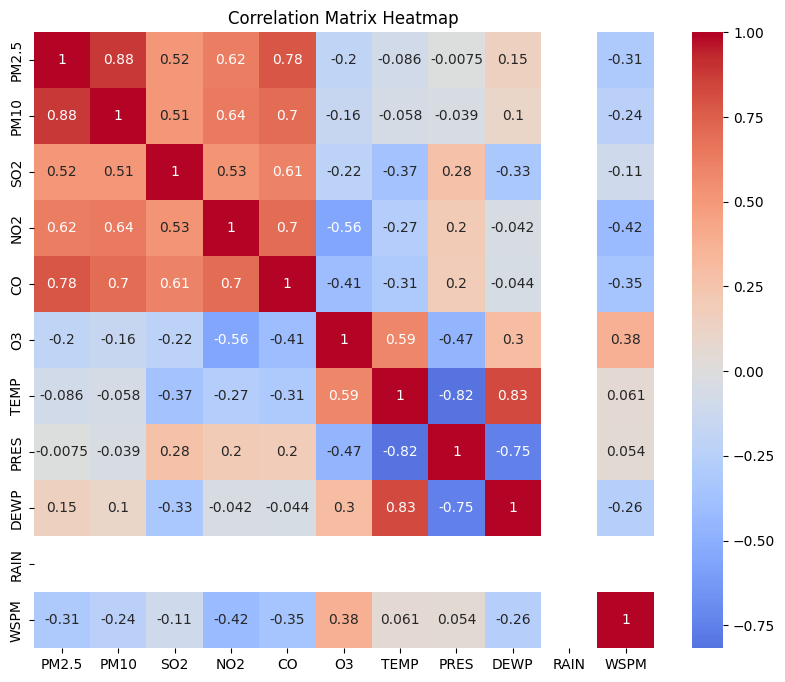

In [142]:
check_correlation(final_df)

#### 🔆 **Explanatory Pertanyaan Ketiga**

Dalam melihat keterhubungan antara variabel dapat menggunakan matrix korelasi seperti visualisasi diatas, untuk memahami matrixnya dapat dibagi menjadi 2 pemahaman:
1. Pemahaman korelasi variabel polusi dengan variabel pemicu polusi.
2. Pemahaman korelasi antar variabel polusi atau pemicu polusi.

Dengan 2 pemahaman ini akan dapat mengetahui mengenai keterhubungan parameter-parameter baik dalam lingkup sejenis atau antar lingkup. Berikut adalah pembahasan detailnya.

---

##### **1. Pemahaman Korelasi Variabel Polusi dengan Variabel Pemicu Polusi (Antar Parameter)**
Dalam memahami korelasi antar parameter kita fokus pada indikator polusi yakni (PM2.5, PM10, SO2, NO2, CO dan O3) dan parameter pemicu polusi yakni (TEMP, PRES, DEWP, WSPM). Untuk yang pertama adalah indikator PM2.5, PM2.5 dapat dilihat pada matrix, tidak memiliki hubungan atau korelasi yang baik dengan indikator pemicu polusi hampir semua nilainya negatif atau kurang dari 1, ada satu parameter yang berkorelasi positif yakni DEWP akan tetapi korelasinya terlalu kecil sebesar 0.15. Ini juga terjadi pada PM10 yang hanya berkorelasi lemah dengan DEWP. Untuk SO2, NO2, dan CO berkorelasi lemah dengan PRES. Sedangkan O3 satu-satunya variabel yang menunjukkan korelasi dengan 2 parameter pemicu lumayan tinggi mendekati 1 pada TEMP dan berkorelasi lemah pada WSPM.

##### **2. Pemahaman Korelasi Varibel Polusi atau Pemicu Polusi (Intra Parameter)**
Dalam memahami korelasi intra-parameter kita fokus pada hubungan parameter satu dengan yang lainnya dalam satu kelompok yang sama. Hal yang menonjol disini adalah, nilai korelasi parameter O3 tidak menunjukkan hubungan/korelasi yang positif antaran sesama kelompok parameternya yakni PM2.5, PM10, SO2, NO2, dan CO. Korelasi parameter O3 bernilai negatif ini dapat dikatakan bahwa O3 tidak berkorelasi sama sekali dengan parameter polusi.

Lalu jika dilihat pada parameter pemicu polusi, indikator TEMP berkorelasi kuat hanya pada indikator DEWP, sedangkan berkorelasi sangat lemah pada indikator WSPM. Indikator PRES bahkan pada matrix tidak memiliki korelasi yang kuat antar yang lainnya, hanya korelasi sangat lemah pada indikator WSPM. Untuk indikator DEWP, seperti yang dijelaskan, hanya berkorelasi tinggi pada indikator TEMP. Lalu terakhir, indikator WSPM hanya berkorelasi sangat lemah pada TEMP dan PRES.

## 🚥 **Dashboard Data Visualization - Streamlit**

### **1. Tahap Persiapan Data dan Streamlit untuk Visualisasi**

Tahap persiapan ini akan memastikan alat-alat atau tool yang digunakan sudah baik seperti text editor dan lainnya. Selain itu pastikan sudah menjalankan kode pada analisis sebelumnya sehingga data sudah siap untuk dilakukan pemodelan dashboard.

Untuk itu hal-hal yang disiapkan terlebih dahulu:

1. DataFrame `final_df` yang menampung keseluruhan tabel sudah diubah menjadi .csv untuk memudahkan pengembanan dashboard. Untuk dataframe ini bisa dilakukan upload terlebih dahulu atay menjalankan kode keseluruhan analisis sebelumnya.

2. Jika menggunakan platform cloud seperti colab maka perlu konfigurasi pihak ketiga seperti **ngrok** agar dapat diakses dalam proses pembuatannya, jika secara local maka cukup streamlit saja.

3. Streamlit hanya berjalan pada ekstensi file .py bukan .ipynb jadi untuk dapat menggunakannya pada platform jupiter notebook bisa mengubah hasil kode menjadi .py terlebih dahulu, dengan `%%writefile nama_file.py`.

4. Khusus untuk penggunaan ngrok sebagai pihak ketiga, diperlukan pembuatan akun dahulu untuk mendapatkan token authentifikasinya, lalu melakukan konfigurasi token `!ngrok authtoken kode_token`.

5. Sebagai tambahan, jika sudah memiliki `final_df.csv`, `aqi-logo`, `app.py`, maka lakukan upload pada google colab dan silahkan langsung menuju ke Tahap 3 - Menjalankan Dasboard segmen *Start Server*.

6. Tidak lupa untuk menjalankan kode pada *Segmen Library Data Analisis* sebelum memulai menjalankan Streamlit di goole colab.

In [100]:
!pip install -q streamlit pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 105.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.1 MB/s eta 0:00:00


In [101]:
# Authentification
!ngrok authtoken kode_token

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [102]:
final_df = pd.read_csv('dashboard/final_df.csv')
final_df.head()

,datetime,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,10.0,18.0,4.0,16.0,300.0,77.0,-0.7,1023.0,-16.1,0.0,NNW,3.4,Aotizhongxin
1,2013-03-01 01:00:00,10.0,18.0,4.0,16.0,300.0,77.0,-1.1,1023.2,-16.1,0.0,N,3.4,Aotizhongxin
2,2013-03-01 02:00:00,10.0,18.0,5.0,16.0,300.0,73.0,-1.1,1023.5,-16.1,0.0,NNW,3.4,Aotizhongxin
3,2013-03-01 03:00:00,10.0,18.0,11.0,16.0,300.0,72.0,-1.4,1024.5,-16.1,0.0,NW,3.1,Aotizhongxin
4,2013-03-01 04:00:00,10.0,18.0,12.0,16.0,300.0,72.0,-1.9,1025.2,-16.1,0.0,N,2.0,Aotizhongxin


### **2. Tahap Implementasi Streamlit**

In [103]:
%%writefile dashboard/dashboard.py

# Library Data Retrieving and Modification
import zipfile
import os

# Library for Data Preprocessing
import pandas as pd
import numpy as np

# Library for Visualization
from scipy.interpolate import interp1d
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Library for Dashboard
import streamlit as st

# """
# Segement 1 : Add Function for Visualization

# This section will add a function that will use to processing the dataframe,
# make visualization, and others.
# """

def load_dataframe(filepath):
    """
    Load and preprocess a DataFrame from a CSV file.

    Parameters:
    - file_path : str
        The file path to the CSV file containing the DataFrame.

    Returns:
    - pandas.DataFrame
        A DataFrame sorted by 'datetime', with datetime columns converted.
    """

    # Read the dataframe
    all_df = pd.read_csv(filepath)

    # Ensure the selected column is datetime format
    datetime_columns = ["datetime"]

    for column in datetime_columns:
      all_df[column] = pd.to_datetime(all_df[column])

    return all_df

def filter_data_level(df, level):
    """
    Filters the given DataFrame based on the specified levels (year, month, day).

    This function dynamically displays Streamlit selectboxes for each filter level
    (year, month, day) based on the provided `level` list, and filters the DataFrame
    accordingly. The function assumes the DataFrame has columns `year`, `month`, and
    `day` for filtering.

    Parameters:
    - df (pd.DataFrame): The input DataFrame containing the data to be filtered.
    - level (list): A list containing the filtering levels. It can include 'year',
      'month', and 'day'. The filtering occurs based on the order of the levels in the list.

    Returns:
    - pd.DataFrame: The filtered DataFrame based on the selected levels.
    """

    if 'year' in level:
        selected_year = st.selectbox("Select Year:", df['year'].unique())
        df = df[df['year'] == selected_year]
    if 'month' in level:
        selected_month = st.selectbox("Select Month:", df['month'].unique())
        df = df[df['month'] == selected_month]
    if 'day' in level:
        selected_day = st.selectbox("Select Day:", df['day'].unique())
        df = df[df['day'] == selected_day]

    return df

def filter_selected_datetime(df, all_cols):
    """
    Function to dynamically filter the DataFrame by year, month, day, and hour.

    Parameters:
    - spatial_df (pd.DataFrame): The dataframe containing datetime and spatial information.

    Returns:
    - selected_year (int or None): The selected year.
    - selected_month (int or None): The selected month.
    - selected_day (int or None): The selected day.
    - selected_hour (int or None): The selected hour.
    - filtered_df (pd.DataFrame): The filtered dataframe based on the selections.
    """

    # Initialize empty selections
    selected_year = None
    selected_month = None
    selected_day = None
    selected_hour = None

    # Select Year
    selected_year = all_cols[0].selectbox("Select Year:", options=[None] + sorted(df['datetime'].dt.year.unique()))

    # Select Month
    if selected_year is not None:
        available_months = sorted(df[df["datetime"].dt.year == selected_year]["datetime"].dt.month.unique())
    else:
        available_months = []
    selected_month = all_cols[1].selectbox("Select Month:", options=[None] + available_months)

    # Select Day
    if selected_year is not None and selected_month is not None:
        available_days = sorted(df[(df["datetime"].dt.year == selected_year) & (df["datetime"].dt.month == selected_month)]["datetime"].dt.day.unique())
    else:
        available_days=[]
    selected_day = all_cols[2].selectbox("Select Day:", options=[None] + available_days)

    # Select Hour
    if selected_year is not None and selected_month is not None and selected_day is not None:
      available_hours = sorted(df[(df["datetime"].dt.year == selected_year) & (df["datetime"].dt.month == selected_month) & (df["datetime"].dt.day == selected_day)]["datetime"].dt.hour.unique())
    else:
      available_hours=[]
    selected_hour = all_cols[3].selectbox("Select Hour:", options=[None] + available_hours)

    # Apply the selected filters to the dataframe
    filtered_df = df.copy()

    # Filter Selection
    if selected_year is not None:
        filtered_df = filtered_df[filtered_df["datetime"].dt.year == selected_year]
    if selected_month is not None:
        filtered_df = filtered_df[filtered_df["datetime"].dt.month == selected_month]
    if selected_day is not None:
        filtered_df = filtered_df[filtered_df["datetime"].dt.day == selected_day]
    if selected_hour is not None:
        filtered_df = filtered_df[filtered_df["datetime"].dt.hour == selected_hour]

    all_filter = [selected_year, selected_month, selected_day, selected_hour]

    return all_filter, filtered_df

def aggregate_data(df, visualization_type):
    """
    Aggregates the given DataFrame based on the specified visualization type (Annual, Monthly, Daily, or Hourly).

    This function computes aggregated statistics (mean) on air quality data, grouped by time-based components
    such as year, month, day, or hour. The function can be customized to aggregate data for a specific year,
    month, or day if necessary.

    Parameters:
    - df : pandas.DataFrame
        The input DataFrame containing air quality data. Must include a 'datetime' column and pollutant data columns
        (e.g., 'PM2.5', 'PM10').

    - visualization_type : str
        The type of aggregation to perform. Accepted values are:
        - 'Annual' : Aggregates data by year.
        - 'Monthly' : Aggregates data by month, optionally for a specific year.
        - 'Daily' : Aggregates data by day, optionally for a specific month and year.
        - 'Hours' : Aggregates data by hour, optionally for a specific day, month, and year.

    - component_date : dict, optional (default is {'year': None, 'month': None, 'days': None})
        A dictionary specifying the specific year, month, and day for monthly, daily, and hourly aggregations.
        The dictionary may include:
        - 'year' : The specific year for monthly, daily, or hourly aggregation.
        - 'month' : The specific month for daily or hourly aggregation.
        - 'days' : The specific day for hourly aggregation.
        If not provided, the function will aggregate based on all available data.

    Returns:
    - agg_df : pandas.DataFrame
        The aggregated DataFrame based on the chosen visualization type. The data is grouped by relevant time units
        (e.g., year, month, day, or hour), and the mean of each pollutant is computed for each group.

    - id_vars : list
        A list of columns used as identifier variables for the aggregation. These columns depend on the selected
        aggregation type (e.g., ['station', 'year'] for annual aggregation).

    - labels : list
        A list containing the name of the time unit used in the aggregation, along with its descriptive label
        (e.g., ['year', 'Year']).

    Raises:
    - ValueError : If 'datetime' column is missing in the DataFrame.
    - ValueError : If an invalid 'visualization_type' is provided.
    - ValueError : If required values for year, month, or day are missing when performing monthly, daily, or hourly aggregation.
    """

    # Raise Value Error if datetime Column not present.
    if 'datetime' not in df.columns:
      raise ValueError("'datetime' column is missing in the DataFrame.")

    # Detect Year, Month, Day, and Hour
    df.loc[:, 'year'] = df['datetime'].dt.year
    df.loc[:, 'month'] = df['datetime'].dt.month
    df.loc[:, 'day'] = df['datetime'].dt.day
    df.loc[:, 'hour'] = df['datetime'].dt.hour

    # Initialize variables
    agg_df = None
    id_vars = []
    labels = []

    # Use match-case for aggregation
    match visualization_type:
      case 'Annual':
          agg_df = df.groupby(['station', 'year']).mean().reset_index()
          id_vars = ['station', 'year']
          labels = ['year', 'Year']
          agg_df.drop(columns=['month', 'day', 'hour'], inplace=True)

      case 'Monthly':
          if df['year'].nunique() > 1:
              df = filter_data_level(df, ['year'])
          agg_df = df.groupby(['station', 'month']).mean().reset_index()
          id_vars = ['station', 'month']
          labels = ['month', 'Month']
          agg_df.drop(columns=['year', 'day', 'hour'], inplace=True)

      case 'Daily':
          if df['month'].nunique() > 1:
              df = filter_data_level(df, ['year', 'month'])
          agg_df = df.groupby(['station', 'day']).mean().reset_index()
          id_vars = ['station', 'day']
          labels = ['day', 'Day']
          agg_df.drop(columns=['month', 'year', 'hour'], inplace=True)

      case 'Hours':
          if df['day'].nunique() > 1:
              df = filter_data_level(df, ['year', 'month', 'day'])
          agg_df = df.groupby(['station', 'hour']).mean().reset_index()
          id_vars = ['station', 'hour']
          labels = ['hour', 'Hour']
          agg_df.drop(columns=['month', 'day', 'year'], inplace=True)

      case _:
          raise ValueError("Invalid visualization type. Choose from 'Annual', 'Monthly', 'Daily', 'Hours'.")

    return agg_df, id_vars, labels

def ploty_line_visualization(data, id_vars, labels, parameters, title_template="Average Concentration Data by Station"):
    """
    Creates a Plotly line chart to visualize air quality data by station and a specified time unit (e.g., year, month, hour).

    Parameters:
    - data : pandas.DataFrame
        The input data containing station names, time variables, and pollutant concentrations.
        The DataFrame must include columns corresponding to the time unit(s), pollutant concentrations, and station identifiers.

    - id_vars : list
        The identifier variables used to group the data (e.g., ['station', 'year']).

    - labels : list
        A list containing the name of the time unit column and its descriptive label (e.g., ['year', 'Year']).

    - parameters : list
        A list of pollutant columns to include in the visualization (e.g., ['PM2.5', 'PM10']).

    - title_template : str, optional (default: "Concentration Data by Station and {}")
        A string template for the chart title, with the placeholder `{}` being replaced by the descriptive label of the time unit.

    Returns:
    - plotly.graph_objects.Figure
        A Plotly figure object representing the line chart, visualizing the pollutant concentrations by station over the specified time unit(s).
    """

    # Check if the dataframe empty or not
    if data.empty:
      raise ValueError("The data provided is empty. Please check the aggregation process.")

    # For Better Visualization will Using Long Format with Function melt()
    df_melted = data.melt(
        id_vars=id_vars,
        value_vars=parameters,
        var_name='Pollutant',
        value_name='Concentration'
    )

    # Define Free Variabel to Set the Visualization Plot
    if 'month' in df_melted.columns:
        month_names = {
            1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
            7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
        }
        df_melted['month_name'] = df_melted['month'].map(month_names)
        labels[0] = 'month_name'
        tick_mode = 'array'
        tick_val = list(month_names.values())
        tick_text = tick_val
        tick_angle = 45
    elif 'hour' in df_melted.columns:
        df_melted['AM_PM'] = df_melted['hour'].apply(lambda x: f"{x % 12 or 12} {'AM' if x < 12 else 'PM'}")
        labels[0] = 'AM_PM'
        tick_mode = 'array'
        tick_val = df_melted['AM_PM'].unique()
        tick_text = tick_val
        tick_angle = 90
    else:
        tick_mode = 'linear'
        tick_val = None
        tick_text = None
        tick_angle = None

    fig = px.line(
        df_melted,
        x=f"{labels[0]}",
        y='Concentration',
        color='station',
        labels={labels[0]: labels[1], 'Concentration': 'Concentration', 'station': 'Station'},
        line_shape='linear'
    )

    # Set the Layout Visualization
    fig.update_layout(
        title=title_template,
        legend_title='Station',
        template='simple_white',
        width=900,
        height=450,
        title_font=dict(size=16),
        xaxis=dict(
            title="",
            title_font=dict(size=14),
            tickfont=dict(size=12),
            showgrid=False,
            tickmode=tick_mode,
            tickformat=".0f",
            tickvals=tick_val,
            ticktext=tick_text,
            tickangle=tick_angle
        ),
        yaxis=dict(
            title="",
            title_font=dict(size=14),
            tickfont=dict(size=12),
            showgrid=True,
            gridcolor='lightgrey'
        ),
        legend=dict(
            groupclick='toggleitem',
            title='Station',
            font=dict(size=12),
        ),
        hovermode='closest',
        plot_bgcolor='white',
        paper_bgcolor='ghostwhite'
    )

    return fig

def ploty_bar_visualization(data, id_vars, labels, parameters, title_template="Average Concentration Data by Station"):
    """
    Visualizes pollutant concentration data in a stacked bar plot, with dynamic hover information
    based on the type of time-related data available (month, year, day, or AM/PM).

    Parameters:
    - data : pandas.DataFrame
        The input dataframe containing the data to be visualized.

    - id_vars : list of str
        The columns in the dataframe that will be used for grouping the x-axis (e.g., station name).

    - labels : list of str
        A list where the first item is the column used for coloring the bars (e.g., 'year')
        and the second item is the label for that column in the plot.

    - parameters : list of str
        A list containing the names of the pollutant parameters (e.g., ['PM2.5']) to be plotted.

    - title_template : str, optional, default="Average Concentration Data by Station and {}"
        The template for the plot's title. The `{}` placeholder will be replaced with the second
        item in the `labels` list.

    Returns:
    - plotly.graph_objects.Figure
        The Plotly figure object containing the bar plot visualization.
    """

    # Default hover customiation
    custom_value = 'datetime'
    hover_temp = "Date: %{customdata[0]}<br>"

    # Customize Month Column and Hover
    if 'month' in data.columns:
      month_names = {
          1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
          7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
      }
      data['Month'] = data['month'].map(month_names)
      custom_value = 'Month'
      hover_temp = "Month: %{customdata[0]}<br>"

    # Customize Year Column and Hover
    elif 'year' in data.columns:
      custom_value = 'year'
      hover_temp= "Year: %{customdata[0]}<br>"

    # Customize Day Column and Hover
    elif 'day' in data.columns:
      custom_value = 'day'
      hover_temp= "Day: %{customdata[0]}<br>"

    # Customize Clocl Column and Hover
    else:
      data['AM_PM'] = data['hour'].apply(lambda x: f"{x % 12 or 12} {'AM' if x < 12 else 'PM'}")
      custom_value = 'AM_PM'
      hover_temp= "Hour: %{customdata[0]}<br>"

    # Do Sorting Data by Parameter
    data = data.sort_values(by=parameters[0])

    # Wrap All Variabel Visualization
    fig = px.bar(
        data,
        x=id_vars[0],
        y=parameters,
        color=id_vars[1],
        barmode='stack',
        hover_data=None,
    )

    # Customize Hover
    fig.update_traces(customdata=data[[custom_value]].values)
    fig.update_traces(
        hovertemplate="<b>%{x}</b><br>"
        + "Concentration: %{y:.2f}<br>"
        + hover_temp
    )

    # Set the Layout Visualization
    fig.update_layout(
        title=title_template,
        legend_title='Station',
        template='simple_white',
        width=900,
        height=450,
        title_font=dict(size=16),
        xaxis=dict(
            title="",
            title_font=dict(size=14),
            tickfont=dict(size=12),
            showgrid=False,
            tickformat=".0f",
        ),
        yaxis=dict(
            title="",
            title_font=dict(size=14),
            tickfont=dict(size=12),
            showgrid=True,
            gridwidth=1,
            gridcolor='lightgrey'
        ),
        legend=dict(
            title='Station',
            font=dict(size=12),
        ),
        hovermode='closest',
        plot_bgcolor='white',
        paper_bgcolor='ghostwhite'
    )

    return fig

def ploty_geospatial_visualization(filtered_df, selected_filters, parameter):
    """
    Generates a geospatial visualization (scatter plot on a map) based on the given DataFrame
    and selected filters. The plot displays pollutant data based on the selected year, month,
    day, and hour, with additional data about the stations.

    The function filters the DataFrame based on the selected filters (year, month, day, hour),
    groups the data by the relevant columns, and visualizes it using Plotly's scatter_mapbox
    function.

    Parameters:
    - filtered_df (pd.DataFrame): The input DataFrame containing the data to be visualized.
    - selected_filters (list): A list of selected filters for the visualization in the order
      [selected_year, selected_month, selected_day, selected_hour].
    - parameter (list): A list containing the column name of the pollutant (e.g., ["PM2.5"]).

    Returns:
    - fig (plotly.graph_objs.Figure): The Plotly figure object containing the geospatial
      visualization.
    """

    # Extract selected filters
    selected_year, selected_month, selected_day, selected_hour = selected_filters

    # Define Group Column and Hover for Visualization
    group_cols = ["station", "latitude", "longitude"]
    if selected_hour is not None:
        filtered_df["hour"] = filtered_df["datetime"].dt.hour
        group_cols = ["hour"] + group_cols
        hover_cols = ["hour", parameter[0]]
    elif selected_day is not None:
        filtered_df["day"] = filtered_df["datetime"].dt.day
        group_cols = ["day"] + group_cols
        hover_cols = ["day", parameter[0]]
    elif selected_month is not None:
        filtered_df["month"] = filtered_df["datetime"].dt.month
        group_cols = ["month"] + group_cols
        hover_cols = ["month", parameter[0]]
    elif selected_year is not None:
        filtered_df["year"] = filtered_df["datetime"].dt.year
        group_cols = ["year"] + group_cols
        hover_cols = ["year", parameter[0]]

    # Sort the Filter Dataframe
    filtered_df = (
        filtered_df.groupby(group_cols)
        .agg({parameter[0]: "mean"})
        .reset_index()
    )

    # Do Visualization
    fig = px.scatter_mapbox(
        filtered_df,
        lat="latitude",
        lon="longitude",
        color=parameter[0],
        size=parameter[0],
        hover_name="station",
        hover_data=hover_cols,
        mapbox_style="carto-positron",
        title="Geospatial Visualization Polutan Data",
        zoom=5,
    )

    # Adjust layout to remove gaps and specify the figure height
    fig.update_layout(
        height=400,
        margin={"r": 100, "t": 50, "l": 0, "b": 0},  # Adjust margin
    )

    return fig

def check_correlation(df):
    """
    Plots a correlation matrix heatmap for the numeric columns of a DataFrame.

    This function calculates the Pearson correlation coefficient between each
    pair of numeric columns, excluding specified non-numeric columns, and
    visualizes the correlation matrix as a heatmap. Correlation coefficients
    range from -1 to 1, with values closer to 1 or -1 indicating stronger correlations.
    - Positive values indicate a positive correlation.
    - Negative values indicate a negative correlation.

    Parameters:
    - df (pd.DataFrame): The input DataFrame containing numeric and non-numeric data.

    Returns:
    - None: This function only displays the heatmap and does not return any values.
    """

    # Drop column that not will use in make correlation matrix
    df_cor = df.drop(columns=['station', 'wd', 'datetime', 'RAIN'])

    # Get correlation value and store in correlation variabel
    correlation_matrix = df_cor.corr()

    # Visualize the correlation value into correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix Heatmap')
    st.pyplot(plt)



# """
# Segment 2 : Make Filter Layout in Side Bar

# This section will make filter layout in side bar using streamlit method siderbar.
# for the input is start date and end date. That will pass to new dataframe main_df
# that contain data from selected date
# """

# Load DataFrame and Define Variabel for Sidebar
final_df = load_dataframe('dashboard/final_df.csv')
p_polution_final_df = final_df.drop(columns=['TEMP','PRES','DEWP','RAIN','wd','WSPM'])

# Make Filter Layout in Side Bar
with st.sidebar:

  # Set image logo
  st.image("data/aqi-logo.png")

  # Set start_date and end_date from input
  p_polution_final_df["date"] = pd.to_datetime(p_polution_final_df["datetime"]).dt.date
  min_date = final_df["datetime"].min()
  max_date = final_df["datetime"].max()

  start_date, end_date = st.date_input(
      label="Rentang Waktu",
      min_value=min_date,
      max_value=max_date,
      value=[min_date, max_date]
  )

# Define dataframe filter
main_df = p_polution_final_df[(p_polution_final_df["date"] >= start_date) & (p_polution_final_df["date"] <= end_date)]
main_df = main_df.drop(columns=["date"])



# """
# Segment 3 : Define the Variabel That will Use for Dashboard Visualization

# This section will add some visulization that will use in dashboard that also correlated
# with business question. The visualization that will use wil same as the section
# Data Visualization before.
# """

# Initialize Header Dashboard
st.header("Dicoding Air Quality Dashboard 🆘")

# Variabel for Visualization
st.subheader("Select Parameter and Type Visualization")
parameter = st.radio(
    "Choose Parameter Visualization:",
    ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"],
    horizontal=True
)

visualization_type = st.radio(
    "Choose Visualization Type:",
    ["Annual", "Monthly", "Daily", "Hours"],
    horizontal=True
)

title= f"Trend of {parameter} - {visualization_type} Aggregation"
title_bar= f"Best and Worst of {parameter} - {visualization_type} Aggregation"

# Visualize 1 : Make Line Visualization for Trend Pollution Parameter
st.subheader("Trend Polution Parameter 📈")
st.markdown("This chart shows the trend of the selected air quality parameter over time.")

agg_df, id_vars, labels = aggregate_data(main_df, visualization_type)
fig = ploty_line_visualization(agg_df, id_vars, labels, [parameter], title_template=title)
st.plotly_chart(fig, use_container_width=True)

explanation = """
- Visualisasi dengan menggunakan line plot dapat melihat trend data baik dalam kategori Tahunan, Bulanan, Harian, dan bahkan Jam.
- Dalam menggunakannya pastikan sudah menetapkan rentangan tanggal dan memilih tipe visualisasi yang sesuai.
- Jika rentangan tahunan, maka visualisasi yang dapat ditampilkan adalah trend antar tahun, bulan, hari, dan jam.
- Sebaliknya jika rentangan hanya 1 bulan, maka visualisasi yang muncul nanti hanya rentangan hari, dan juga bisa memilih rentangan jam.
"""

with st.expander("Explanation: "):
    st.markdown(explanation)

# Visualize 2: Make Bar Visualization for Show Best and Worst Year, Month, Day, and Hours in Polution Parameter
st.subheader("Best and Worst Polutan Parameter According to Datetime 📊 ")
st.markdown("This bar chart shows the worst and best selected air quality parameter in a time.")

bar_fig = ploty_bar_visualization(agg_df, id_vars, labels, [parameter], title_template=title_bar)
st.plotly_chart(bar_fig, use_container_width=True)

explanation = """
- Penggunaan visualisasi bar plot ini menunjukkan perbandingan data baik dalam tahun, bulan, hari, dan jam.
- Jika tidak ada data yang dibandingkan maka visualisasi akan menggunakan data yang ada. Sebagai contoh:
  - Jika memilih rentang nilai dalam satu bulan, maka jika memilih tipe visualisasi 'Annual'
    visualisasi akan tetap jalan dengan data keseluruhan di tahun itu.
  - Ini sama dengan jika memilih tipe visualisasi 'Monthly' maka tetap menampilkan visualisasi hanya pada bulan itu saja.
  - Akan tetapi jika memlih tipe visualisasi 'Daily' atau 'Hourly' baru akan ada nilai yang dibandingkan.
- Nilai pada data sudah dilakukan proses sorting jadi data teratas adalah data dengan konsentrasi tertinggi
  baik pada tipe Tahun, Bulan, Hari, atau Jam.
"""

with st.expander("Explanation: "):
    st.markdown(explanation)

# Visualize 3: Make Geospasial Visualization for Area of Polution
st.subheader("Area of Polution 🌍")
st.markdown("This map shows the distribution of the selected air quality parameter across different locations.")

stations_coords = {
    "Aotizhongxin": (41.731242, 123.456778),
    "Changping": (40.221, 116.2312),
    "Dingling": (40.28998423518348, 116.2393424781757),
    "Dongsi": (40.10208908941478, 116.31657335910373),
    "Guanyuan": (39.94113871141321, 116.3610710753842),
    "Gucheng": (39.91270053243136, 116.1868698799306),
    "Huairou": (43.06043347888646, 117.46726428196578),
    "Nongzhanguan": (39.93978579546827, 116.46859787734736),
    "Shunyi": (40.151287025024715, 116.69280368021326),
    "Tiantan": (39.88189413732897, 116.42047003643812),
    "Wanliu": (39.99843210685499, 116.25774299569612),
    "Wanshouxigong": (39.90816416629832, 116.26439549963654)
}

spatial_df = final_df.copy()
spatial_df['date'] = pd.to_datetime(spatial_df["datetime"]).dt.date
spatial_df = spatial_df[(spatial_df["date"] >= start_date) & (spatial_df["date"] <= end_date)]
spatial_df.drop(columns=["date"])

spatial_df["latitude"] = spatial_df["station"].map(lambda x: stations_coords[x][0])
spatial_df["longitude"] = spatial_df["station"].map(lambda x: stations_coords[x][1])
spatial_df["datetime"] = pd.to_datetime(spatial_df["datetime"])

st.markdown("#### Select Geospasial Datetime")
col1, col2, col3, col4 = st.columns([1, 1, 1, 1])

all_cols = [col1, col2, col3, col4]
all_filters, filtered_df = filter_selected_datetime(spatial_df, all_cols)

fig = ploty_geospatial_visualization(filtered_df, all_filters, [parameter])
st.plotly_chart(fig, use_container_width=True)

explanation = """
- Ini adalah persebaran parameter polusi sesuai dengan latitude dan longitude-nya.
- Dalam persebaran ini diharuskan memilih persebaran sesuai dengan tahun, lalu bulan, hari, dan waktunya.
- Jika peta persebaran tidak langsung menunjukkan lokasinya maka bisa dikatakan dalam waktu itu tidak ada
data persebaran yang tersedia. Sebagai contoh:
  - Memilih tanggal 1 Januari 2023 tidak akan memunculkan nilai persebaran peta. Karena tidak ada data pada tanggal tersebut.
"""

with st.expander("Explanation: "):
    st.markdown(explanation)

# Visualize 4: Make Matrix Correlation for Parameter in Air Quality Index
st.subheader("Matrix Correlation Polutan Parameter 💐")
st.markdown("This matrix shows the correlation between different air quality parameters.")

check_correlation(final_df)

explanation = """
- Korelasi adalah ukuran statistik yang menunjukkan sejauh mana dua variabel beruhubungan.
- Nilai koefisien korelasi berkisar dari -1 hingga 1:
  - **1** menunjukkan korelasi positif sempurna (kedua variabel meningkat bersama).
  - **-1** menunjukkan korelasi negatif sempurna (saat satu variabel meningkat, variabel lainnya menurun).
  - **0** menunjukkan tidak ada korelasi antara variabel-variabel tersebut.
- Pada heatmap ini, warna yang lebih gelap mewakili korelasi yang lebih kuat, dengan warna biru menunjukkan korelasi negatif dan merah menunjukkan korelasi positif.
- Korelasi positif menunjukkan bahwa saat satu variabel meningkat, yang lainnya cenderung meningkat juga, dan sebaliknya untuk korelasi negatif.
"""

with st.expander("Explanation: "):
    st.markdown(explanation)


Writing app.py


### **3. Tahap Menjalankan Dasboard**

#### 🏃🏻‍♀️ **Start Server**

In [104]:
def run_streamlit_app(app_name, port=8501):
    """
    Runs a Streamlit app and sets up an ngrok tunnel to expose it to the internet.

    Parameters:
    ----------
    app_name : str
        The name of the Streamlit app file (e.g., "app.py").
    port : int, optional, default=8501
        The port on which to run the Streamlit app (default is 8501).

    Returns:
    --------
    str
        The public URL provided by ngrok for the Streamlit app.
    """
    # Kill any previous tunnels
    ngrok.kill()

    # Run the Streamlit app
    subprocess.Popen(["streamlit", "run", app_name, "--server.port", str(port)])

    # Start a new ngrok tunnel
    ngrok_tunnel = ngrok.connect(port, "http")

    # Print the public URL for the Streamlit app
    print("Streamlit URL:", ngrok_tunnel.public_url)

    return ngrok_tunnel.public_url

In [105]:
from pyngrok import ngrok
import subprocess

app_name = "dashboard/dashboard.py"
run_streamlit_app(app_name)

Streamlit URL: https://1333-34-172-141-190.ngrok-free.app


'https://1333-34-172-141-190.ngrok-free.app'

#### ❌ **Shutdown Server**


In [106]:
!ps aux | grep ngrok

root        4182  0.8  0.4 1273944 63400 ?       Sl   17:39   0:00 /root/.config/ngrok/ngrok start -
root        4590  0.0  0.0   7376  3576 ?        S    17:40   0:00 /bin/bash -c ps aux | grep ngrok
root        4592  0.0  0.0   6484  2248 ?        S    17:40   0:00 grep ngrok


In [107]:
ngrok.kill()

In [108]:
!ps aux | grep ngrok

root        4597  0.0  0.0   7376  3516 ?        S    17:40   0:00 /bin/bash -c ps aux | grep ngrok
root        4599  0.0  0.0   6484  2268 ?        S    17:40   0:00 grep ngrok
